# Capstone Project (SEPHORA)

# Enhancing Customer Experience: Unraveling Sephora’s Skincare Reviews 

##  Product Dataset Overview 



| Feature           | Description                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------|
| product_id        | The unique identifier for the product from the site                                            |
| product_name      | The full name of the product                                                                    |
| brand_id          | The unique identifier for the product brand from the site                                      |
| brand_name        | The full name of the product brand                                                              |
| loves_count       | The number of people who have marked this product as a favorite                                |
| rating            | The average rating of the product based on user reviews                                        |
| reviews           | The number of user reviews for the product                                                     |
| size              | The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type |
| variation_type    | The type of variation parameter for the product (e.g. Size, Color)                             |
| variation_value   | The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)       |
| variation_desc    | A description of the variation parameter for the product (e.g. tone for fairest skin)          |
| ingredients       | A list of ingredients included in the product, for example: ['Product variation 1:', 'Water, Glycerin', 'Product variation 2:', 'Talc, Mica'] or if no variations ['Water, Glycerin'] |
| price_usd         | The price of the product in US dollars                                                         |
| value_price_usd   | The potential cost savings of the product, presented on the site next to the regular price     |
| sale_price_usd    | The sale price of the product in US dollars                                                    |
| limited_edition   | Indicates whether the product is a limited edition or not (1-true, 0-false)                    |
| new               | Indicates whether the product is new or not (1-true, 0-false)                                 |
| online_only       | Indicates whether the product is only sold online or not (1-true, 0-false)                     |
| out_of_stock      | Indicates whether the product is currently out of stock or not (1 if true, 0 if false)         |
| sephora_exclusive | Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)           |
| highlights        | A list of tags or features that highlight the product's attributes (e.g. ['Vegan', 'Matte Finish']) |
| primary_category  | First category in the breadcrumb section                                                       |
| secondary_category| Second category in the breadcrumb section                                                      |
| tertiary_category | Third category in the breadcrumb section                                                       |
| child_count       | The number of variations of the product available                                             |
| child_max_price   | The highest price among the variations of the product                                         |
| child_min_price   | The lowest price among the variations of the product                                          |


This table organizes the various features and their descriptions in a clear tabular format. Each row represents a specific feature, and the corresponding descriptions are provided in the adjacent cell.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np

# loading in products data

data = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\product_info.csv")
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

From this, we gather that the products dataset contains 27 columns and 8,494 rows of data. The columns vary in data types, and there is missing data within the dataframe.

## Review Dataset Overview



| Feature               | Description                                                                                       |
|-----------------------|---------------------------------------------------------------------------------------------------|
| author_id             | The unique identifier for the author of the review on the website                                 |
| rating                | The rating given by the author for the product on a scale of 1 to 5                                |
| is_recommended        | Indicates if the author recommends the product or not (1-true, 0-false)                           |
| helpfulness           | The ratio of all ratings to positive ratings for the review: helpfulness = total_pos_feedback_count / total_feedback_count |
| total_feedback_count  | Total number of feedback (positive and negative ratings) left by users for the review            |
| total_neg_feedback_count | The number of users who gave a negative rating for the review                                    |
| total_pos_feedback_count | The number of users who gave a positive rating for the review                                    |
| submission_time       | Date the review was posted on the website in the 'yyyy-mm-dd' format                              |
| review_text           | The main text of the review written by the author                                                |
| review_title          | The title of the review written by the author                                                    |
| skin_tone             | Author's skin tone (e.g. fair, tan, etc.)                                                         |
| eye_color             | Author's eye color (e.g. brown, green, etc.)                                                      |
| skin_type             | Author's skin type (e.g. combination, oily, etc.)                                                |
| hair_color            | Author's hair color (e.g. brown, auburn, etc.)                                                    |
| product_id            | The unique identifier for the product on the website                                             |

This table presents the various features related to the review data in a tabular format. Each row corresponds to a specific feature, and the descriptions are provided in the adjacent cell, making it easy to read and understand the details of each feature.

For the datasets related to the reviews, it will be helpful to join them all into one dataframe, which we can do with the following:

In [2]:
# getting the files

import pandas as pd

t1 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_0_250.csv", low_memory=False)
t2 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_250_500.csv", low_memory=False)
t3 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_500_750.csv", low_memory=False)
t4 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_750_1000.csv", low_memory=False)
t5 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_1000_1500.csv", low_memory=False)
t6 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_1500_end.csv", low_memory=False)

# combining the dfs

texta = pd.concat([t1,t2,t3,t4,t5,t6])
texta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1301136 non-null  int64  
 1   author_id                 1301136 non-null  object 
 2   rating                    1301136 non-null  int64  
 3   is_recommended            1107162 non-null  float64
 4   helpfulness               631670 non-null   float64
 5   total_feedback_count      1301136 non-null  int64  
 6   total_neg_feedback_count  1301136 non-null  int64  
 7   total_pos_feedback_count  1301136 non-null  int64  
 8   submission_time           1301136 non-null  object 
 9   review_text               1299520 non-null  object 
 10  review_title              930754 non-null   object 
 11  skin_tone                 1103798 non-null  object 
 12  eye_color                 1057734 non-null  object 
 13  skin_type                 117

We gather that there are around 1.3 million reviews with varying amounts of missing data across 19 columns of the 6 datasets.

It can also be helpful to view the numeric and non-numeric columns of both dataframes. We can do so with the following:

Numeric Columns

In [3]:
numeric_cols = data.select_dtypes(include = ['number']).columns
print(numeric_cols)
print(f'{len(numeric_cols)} Numeric Columns in Products Dataset')

Index(['brand_id', 'loves_count', 'rating', 'reviews', 'price_usd',
       'value_price_usd', 'sale_price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')
15 Numeric Columns in Products Dataset


In [4]:
numeric_cols_reviews = texta.select_dtypes(include = ['number']).columns
print(numeric_cols_reviews)
print(f'{len(numeric_cols_reviews)} Numeric Columns in Reviews Dataset')

Index(['Unnamed: 0', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'price_usd'],
      dtype='object')
8 Numeric Columns in Reviews Dataset


Non-Numeric Columns

In [5]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)
print(f'{len(non_numeric_cols)} Non-Numeric Columns in Products Dataset')

Index(['product_id', 'product_name', 'brand_name', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category'],
      dtype='object')
12 Non-Numeric Columns in Products Dataset


In [6]:
non_numeric_rev_cols = texta.select_dtypes(exclude=['number']).columns
print(non_numeric_rev_cols)
print(f'{len(non_numeric_rev_cols)} Non-Numeric Columns in Reviews Dataset')

Index(['author_id', 'submission_time', 'review_text', 'review_title',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name'],
      dtype='object')
11 Non-Numeric Columns in Reviews Dataset


# Data Cleaning 

## Data Cleaning on product Dataset

Next, we need to clean the products dataset by performing the following tasks:

Assessing missing data and determining its extent. Removing unnecessary data that is not relevant to our analysis. Identifying and handling outliers, if present. Reformatting the data if required.

Here we use the following code to see the amount of nulls by column within the dataset:

In [7]:
num_missing = data.isna().sum()
num_missing

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

<AxesSubplot:>

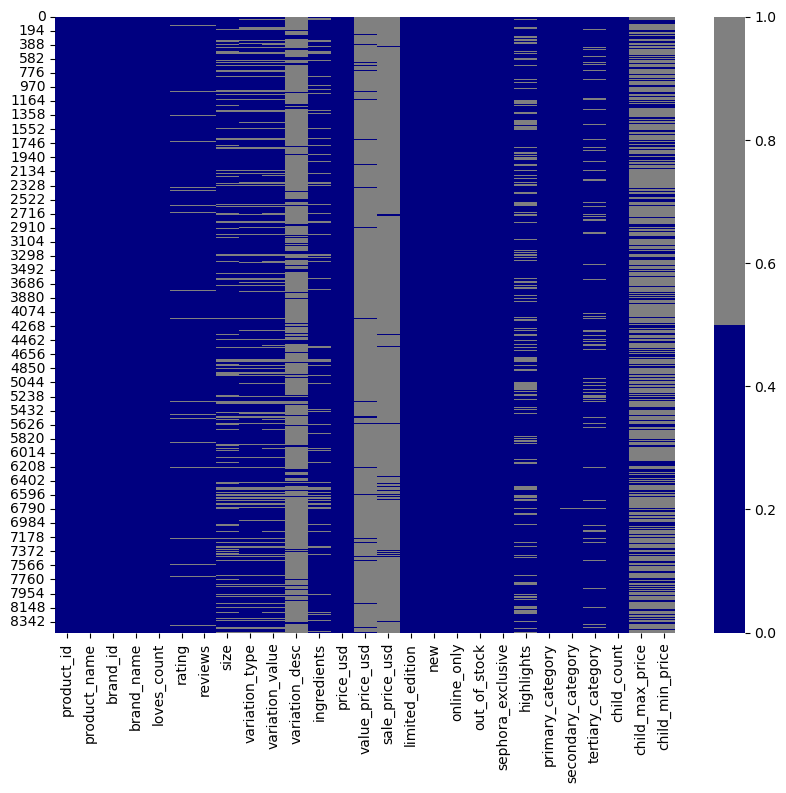

In [8]:
# heatmap to visualize missing data (products)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols= data.columns
colors=['navy','grey']
sns.heatmap(data[cols].isna(),cmap=sns.color_palette(colors))

#### INTERPRETATIONS:

From this, we can make note of the columns with a high percentage of missing data for when we assess which columns to remove from our dataset

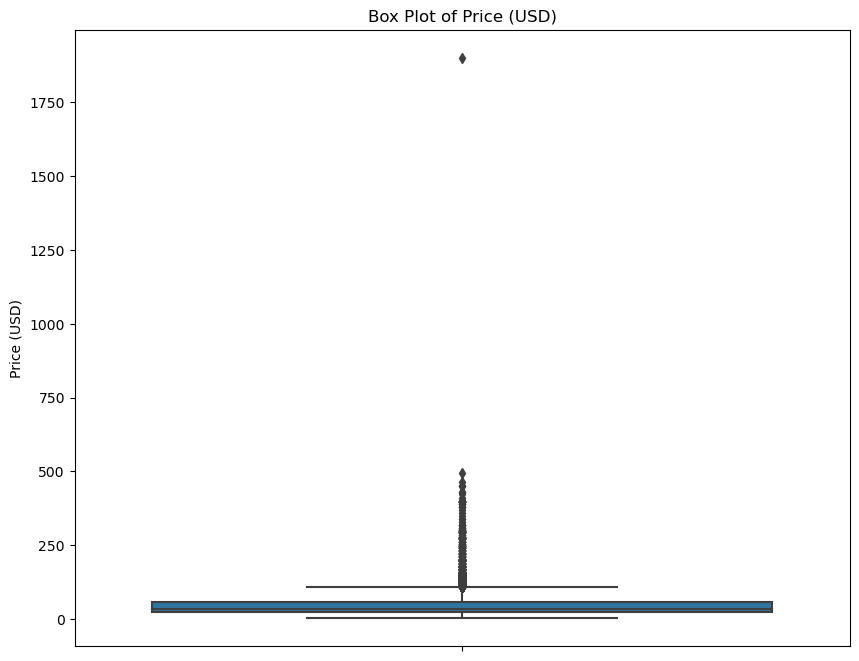

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing the data
# Replace 'data' with the actual DataFrame name

plt.figure(figsize=(10, 8))
sns.boxplot(data=data, y='price_usd')
plt.title('Box Plot of Price (USD)')
plt.ylabel('Price (USD)')
plt.show()

#### Explanation:
By creating a box plot of the 'price_usd' column, we can quickly observe the spread and central tendency of the prices in the dataset. It allows us to identify potential outliers, understand the range of prices, and assess the overall distribution of the prices in terms of quartiles.

#### INTERPRETATION:
In summary, the box plot provides an effective and concise visual summary of the distribution of the 'price_usd' column in the 'data' DataFrame, helping us better understand the pricing patterns and any potential outliers in the dataset.



In [10]:
data.loc[data['price_usd']>1750]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
6802,P502216,Shani Darden by Déesse PRO LED Light Mask,6314,Shani Darden Skin Care,4154,3.75,4.0,NaN,NaN,NaN,...,1,0,1,"['Good for: Loss of firmness', 'Good for: Anti...",Skincare,High Tech Tools,Anti-Aging,0,NaN,NaN


#### INTERPRETATIONS:

The code data.loc[data['price_usd']>1750] retrieves rows from the data DataFrame where the value in the 'price_usd' column is greater than to 1750.

After doing some digging on Sephora's site, we can confirm that the price of the product above is legitimate. However, we will still exclude the outlier from the data to better gauge the price distribution later on.

Dropping the outlier 

In [11]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data"
# Replace "data" with the actual name of your DataFrame if different.

# Code to filter and drop the rows
data.drop(data[data['price_usd'] > 1750].index, inplace=True)

# The above code will drop the rows where 'price_usd' is greater than 1750.


In [12]:
import pandas as pd

# Assuming your dataset is stored in a variable called "data"
# Replace "data" with the actual name of your DataFrame if different.

# Your code to read or import the dataset goes here...
# For example: data = pd.read_csv('your_dataset.csv')

# Drop the specified columns
columns_to_drop = [
    'loves_count',
    'tertiary_category',
    'highlights',
    'child_count',
    'child_max_price',
    'child_min_price',
    'sale_price_usd',
    'value_price_usd',
    'variation_value',
    'variation_desc'
]
data_edited = data.drop(columns=columns_to_drop)

# After dropping the columns, you can use "data_edited" instead of "data" for the updated dataset.


#### INTERPRETATIONS:

We are dropping certain columns from the original dataset to create a new DataFrame called "data_edited." The reason for doing this is to remove unnecessary or irrelevant columns that are not needed for the analysis or that contain a large number of missing values. By dropping these columns, we can create a more focused and compact dataset that only contains the relevant information, making it easier to work with and potentially improving the efficiency of any subsequent data analysis or modeling tasks.



In [13]:
data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   rating              8215 non-null   float64
 5   reviews             8215 non-null   float64
 6   size                6863 non-null   object 
 7   variation_type      7050 non-null   object 
 8   ingredients         7549 non-null   object 
 9   price_usd           8493 non-null   float64
 10  limited_edition     8493 non-null   int64  
 11  new                 8493 non-null   int64  
 12  online_only         8493 non-null   int64  
 13  out_of_stock        8493 non-null   int64  
 14  sephora_exclusive   8493 non-null   int64  
 15  primary_category    8493 non-null   object 
 16  second

In [14]:
data_edited.shape

(8493, 17)

We are creating a heatmap of null values in the "data_edited" DataFrame to visualize and understand the presence of missing data within the dataset.

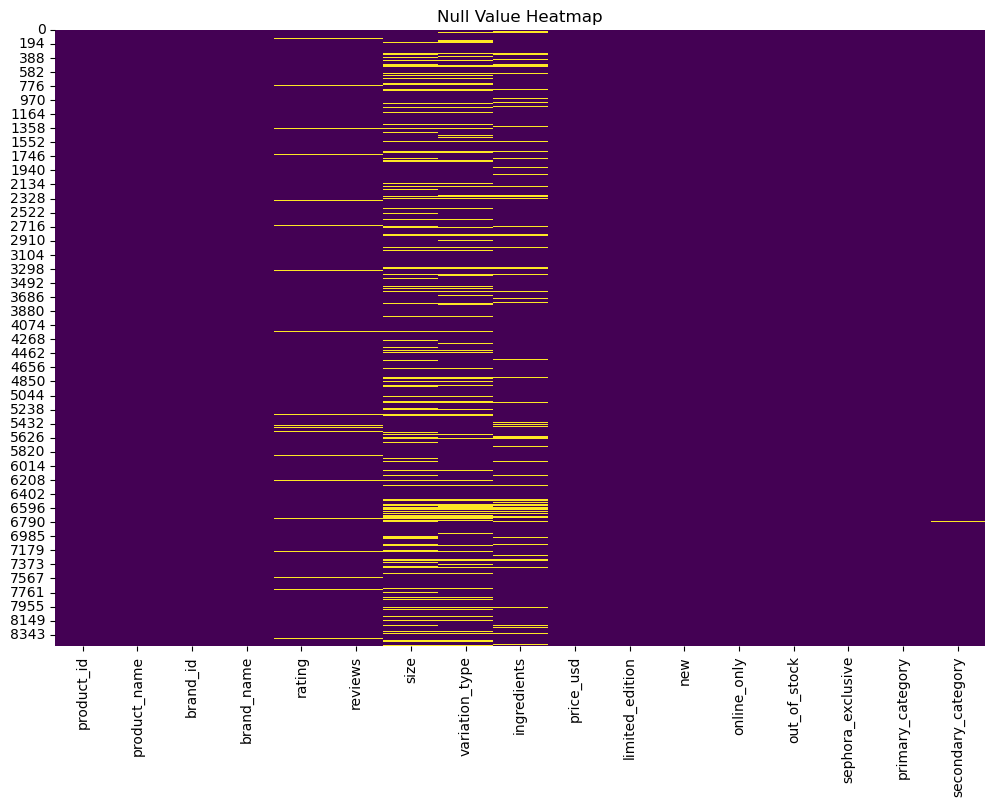

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Create a DataFrame to store information about null values
null_heatmap_data = data_edited.isnull()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(null_heatmap_data, cbar=False, cmap='viridis')
plt.title('Null Value Heatmap')
plt.show()


#### INTERPRETATIONS:

By visualizing the null values using a heatmap, we can make informed decisions on how to handle missing data, such as imputing missing values, removing rows or columns with too many missing values, or applying specific data cleaning techniques.

In [16]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Calculate the mode for 'rating' and 'reviews'
rating_mode = data_edited['rating'].mode().iloc[0]
reviews_mode = data_edited['reviews'].mode().iloc[0]

# Fill the null values with the calculated modes
data_edited['rating'].fillna(rating_mode, inplace=True)
data_edited['reviews'].fillna(reviews_mode, inplace=True)



#### INTERPRETATIONS:

Filling missing values with the mode is a common data imputation technique used when dealing with missing data in a dataset. By using the mode, we are essentially replacing the missing values with the most frequently occurring values in the respective columns

In [17]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'variation_type' column
unique_variation_types = data_edited['variation_type'].unique()

# Print the unique values
print(unique_variation_types)


[nan 'Size + Concentration + Formulation' 'Scent' 'Size' 'Color'
 'Size + Concentration' 'Type' 'Formulation']


In [18]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'size' column
unique_sizes = data_edited['size'].unique()

# Print the unique values
print(unique_sizes)


[nan '3.4 oz/ 100 mL' '0.25 oz/ 7.5 mL' ... '0.25 oz/ 7.5 ml' '2.6 oz'
 '.11 oz / 3.2 mL']


In [19]:
data.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1630
variation_type        1443
variation_value       1597
variation_desc        7243
ingredients            944
price_usd                0
value_price_usd       8042
sale_price_usd        8223
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5739
child_min_price       5739
dtype: int64

In [20]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Calculate the mode for 'secondary_category'
secondary_category_mode = data_edited['secondary_category'].mode().iloc[0]

# Fill null values with the calculated mode for 'secondary_category'
data_edited['secondary_category'].fillna(secondary_category_mode, inplace=True)

# Fill null values in 'size' and 'variation_type' with 'Not Available'
data_edited['size'].fillna('Not Available', inplace=True)
data_edited['variation_type'].fillna('Not Available', inplace=True)


In [21]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'size' column
unique_sizes = data_edited['size'].unique()

# Print the unique values
print(unique_sizes)

['Not Available' '3.4 oz/ 100 mL' '0.25 oz/ 7.5 mL' ... '0.25 oz/ 7.5 ml'
 '2.6 oz' '.11 oz / 3.2 mL']


In [22]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'variation_type' column
unique_variation_types = data_edited['variation_type'].unique()

# Print the unique values
print(unique_variation_types)

['Not Available' 'Size + Concentration + Formulation' 'Scent' 'Size'
 'Color' 'Size + Concentration' 'Type' 'Formulation']


In [23]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Fill null values in 'ingredients' column with 'Not available'
data_edited['ingredients'].fillna('Not available', inplace=True)


In [24]:
data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   rating              8493 non-null   float64
 5   reviews             8493 non-null   float64
 6   size                8493 non-null   object 
 7   variation_type      8493 non-null   object 
 8   ingredients         8493 non-null   object 
 9   price_usd           8493 non-null   float64
 10  limited_edition     8493 non-null   int64  
 11  new                 8493 non-null   int64  
 12  online_only         8493 non-null   int64  
 13  out_of_stock        8493 non-null   int64  
 14  sephora_exclusive   8493 non-null   int64  
 15  primary_category    8493 non-null   object 
 16  second

In [25]:
# Assuming you have already defined the variable data_edited with the edited dataset
numeric_cols = data_edited.select_dtypes(include=['number']).columns
print(numeric_cols)
print(f'{len(numeric_cols)} Numeric Columns in Products Dataset')


Index(['brand_id', 'rating', 'reviews', 'price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive'],
      dtype='object')
9 Numeric Columns in Products Dataset


In [26]:
# Assuming you have already defined the variable data_edited with the edited dataset
numeric_cols = data_edited.select_dtypes(include=['number']).columns
print(numeric_cols)
print(f'{len(numeric_cols)} Numeric Columns in Products Dataset')

Index(['brand_id', 'rating', 'reviews', 'price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive'],
      dtype='object')
9 Numeric Columns in Products Dataset


In [27]:
# Assuming you have a DataFrame named 'data_edited'

# Columns to convert from numeric (int64) to object (string)
columns_to_convert = ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']

# Convert the selected columns to object (string) dtype
data_edited[columns_to_convert] = data_edited[columns_to_convert].astype(str)

# Verify the new dtypes of the selected columns
print(data_edited.dtypes)


product_id             object
product_name           object
brand_id                int64
brand_name             object
rating                float64
reviews               float64
size                   object
variation_type         object
ingredients            object
price_usd             float64
limited_edition        object
new                    object
online_only            object
out_of_stock           object
sephora_exclusive      object
primary_category       object
secondary_category     object
dtype: object


In [28]:
data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   rating              8493 non-null   float64
 5   reviews             8493 non-null   float64
 6   size                8493 non-null   object 
 7   variation_type      8493 non-null   object 
 8   ingredients         8493 non-null   object 
 9   price_usd           8493 non-null   float64
 10  limited_edition     8493 non-null   object 
 11  new                 8493 non-null   object 
 12  online_only         8493 non-null   object 
 13  out_of_stock        8493 non-null   object 
 14  sephora_exclusive   8493 non-null   object 
 15  primary_category    8493 non-null   object 
 16  second

In [29]:
data_edited.head(10)

,product_id,product_name,brand_id,brand_name,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category
0,P473671,Fragrance Discovery Set,6342,19-69,3.6364,11.0,Not Available,Not Available,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,Fragrance,Value & Gift Sets
1,P473668,La Habana Eau de Parfum,6342,19-69,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
3,P473660,Kasbah Eau de Parfum,6342,19-69,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
4,P473658,Purple Haze Eau de Parfum,6342,19-69,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
5,P473661,Kasbah Eau de Parfum Travel Spray,6342,19-69,4.4762,21.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,0,0,1,0,0,Fragrance,Women
6,P473659,Purple Haze Eau de Parfum Travel Spray,6342,19-69,3.2308,13.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,0,0,1,0,0,Fragrance,Women
7,P473666,Invisible Post Eau de Parfum,6342,19-69,3.6250,8.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
8,P472300,Capri Eau de Parfum,6342,19-69,3.5714,7.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
9,P473667,Invisible Post Eau de Parfum Travel Spray,6342,19-69,3.6250,8.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,0,0,1,0,0,Fragrance,Women


In [30]:
data_edited

,product_id,product_name,brand_id,brand_name,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category
0,P473671,Fragrance Discovery Set,6342,19-69,3.6364,11.0,Not Available,Not Available,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,Fragrance,Value & Gift Sets
1,P473668,La Habana Eau de Parfum,6342,19-69,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
3,P473660,Kasbah Eau de Parfum,6342,19-69,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
4,P473658,Purple Haze Eau de Parfum,6342,19-69,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,4.4286,7.0,Not Available,Not Available,"['Talc, Synthetic Fluorphlogopite, Triethylhex...",150.0,0,0,0,0,0,Makeup,Eye
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,"['Alcohol, Aqua / Water / Eau, Parfum / Fragra...",106.0,0,0,0,0,0,Fragrance,Men
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,5.0000,2.0,Not Available,Not Available,"['Mon Paris Eau de Parfum:', 'Alcohol, Parfum/...",134.0,1,1,1,1,0,Fragrance,Value & Gift Sets
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,5.0000,2.0,Not Available,Not Available,"['Alcohol, Parfum/Fragrance, Aqua/Water, Limon...",167.0,1,1,1,0,0,Fragrance,Value & Gift Sets


In [31]:
data_edited.to_csv("C:\\Users\\logeshwar\\Downloads\\Sephora Product dataset.csv",index=False)

## Data Cleaning on Reviews Dataset

Here we use the following code to see the amount of nulls by column within the dataset:

In [32]:
texta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1301136 non-null  int64  
 1   author_id                 1301136 non-null  object 
 2   rating                    1301136 non-null  int64  
 3   is_recommended            1107162 non-null  float64
 4   helpfulness               631670 non-null   float64
 5   total_feedback_count      1301136 non-null  int64  
 6   total_neg_feedback_count  1301136 non-null  int64  
 7   total_pos_feedback_count  1301136 non-null  int64  
 8   submission_time           1301136 non-null  object 
 9   review_text               1299520 non-null  object 
 10  review_title              930754 non-null   object 
 11  skin_tone                 1103798 non-null  object 
 12  eye_color                 1057734 non-null  object 
 13  skin_type                 117

In [33]:
texta.shape

(1301136, 19)

<AxesSubplot:>

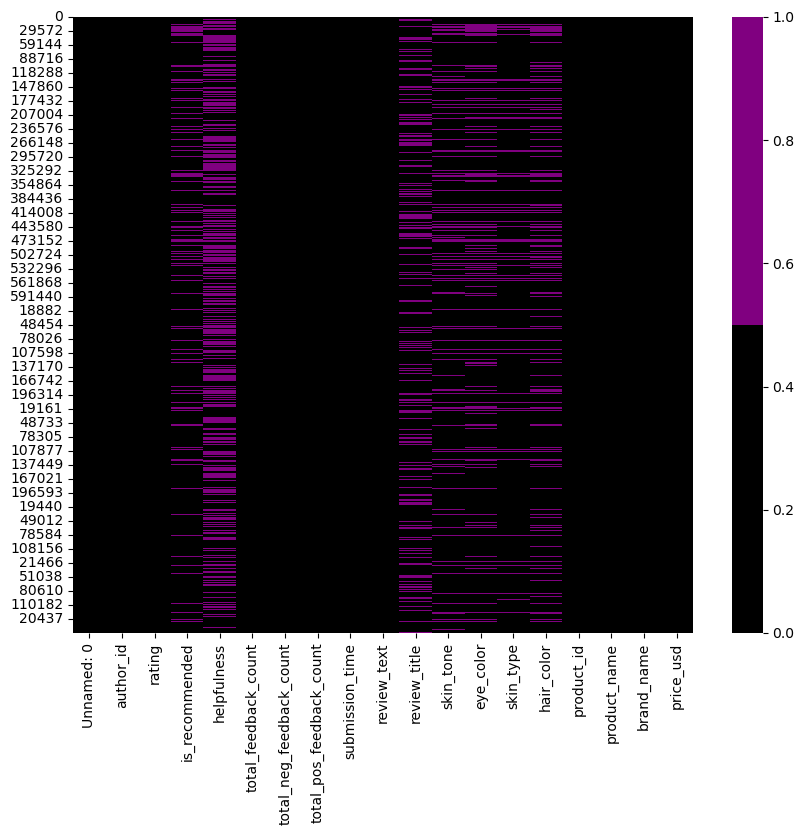

In [34]:
# heatmap to visualize missing data (reviews)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols= texta.columns
colors=['black','purple']
sns.heatmap(texta[cols].isna(),cmap=sns.color_palette(colors))

#### INTERPRETATIONS:
From this, we can make note of the columns with a high percentage of missing data for when we assess which columns to remove from our dataset

In [35]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "texta"
# Replace "texta" with the actual name of your DataFrame if different.

# Get unique values in the 'helpfulness' column
unique_helpfulness = texta['helpfulness'].unique()

# Print the unique values
print(unique_helpfulness)


[1.                nan 0.25       ... 0.182927   0.265625   0.90131599]


### Dropping the unnecessary columns

In [36]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Drop the 'helpfulness' column and the 'Unnamed: 0' column
texta = texta.drop(['helpfulness', 'Unnamed: 0'], axis=1)

# After dropping the columns, 'helpfulness' and 'Unnamed: 0', you can use "text_edited" for the updated dataset.

In [37]:
# Change the DataFrame name from "texta" to "text_edited"
text_edited = texta

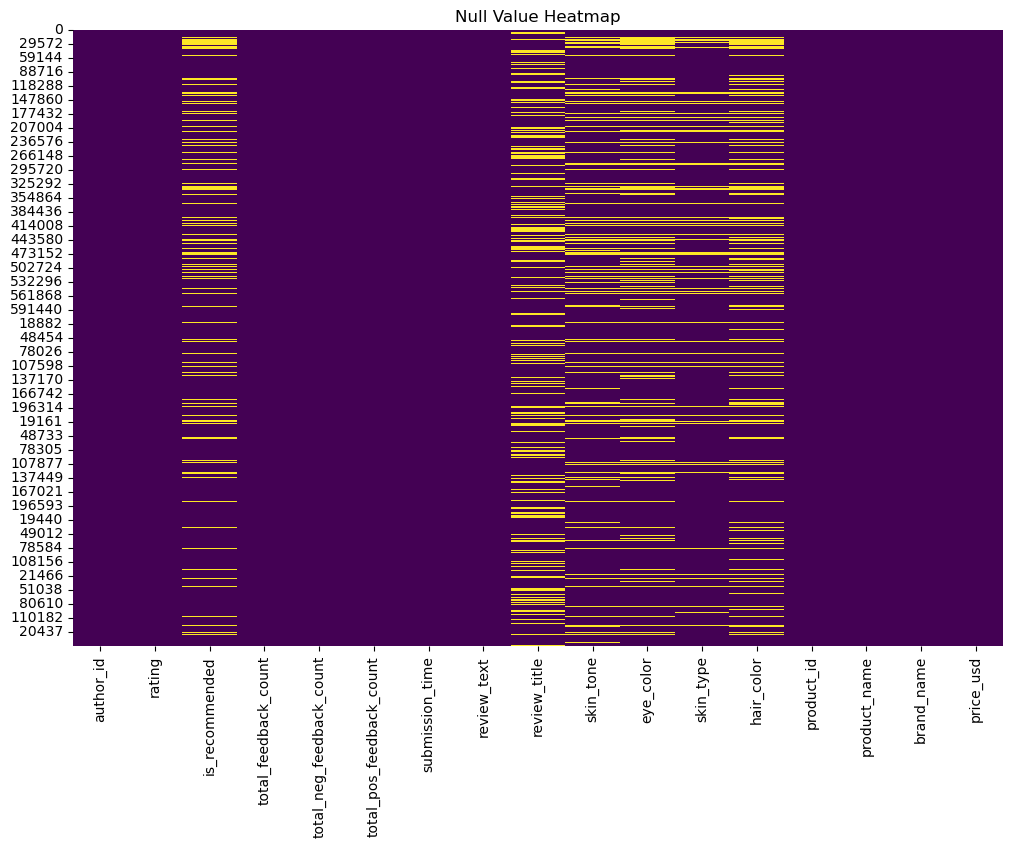

In [38]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Create a DataFrame to store information about null values
null_heatmap_data = text_edited.isnull()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(null_heatmap_data, cbar=False, cmap='viridis')
plt.title('Null Value Heatmap')
plt.show()


In [39]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Calculate the modes for 'eye_color', 'skin_type', 'hair_color', and 'skin_tone'
eye_color_mode = text_edited['eye_color'].mode().iloc[0]
skin_type_mode = text_edited['skin_type'].mode().iloc[0]
hair_color_mode = text_edited['hair_color'].mode().iloc[0]
skin_tone_mode = text_edited['skin_tone'].mode().iloc[0]

# Fill null values with the calculated modes
text_edited['eye_color'].fillna(eye_color_mode, inplace=True)
text_edited['skin_type'].fillna(skin_type_mode, inplace=True)
text_edited['hair_color'].fillna(hair_color_mode, inplace=True)
text_edited['skin_tone'].fillna(skin_tone_mode, inplace=True)


In [40]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Fill null values in 'review_text' and 'review_title' with "Not Available"
text_edited['review_text'].fillna("Not Available", inplace=True)
text_edited['review_title'].fillna("Not Available", inplace=True)



In [41]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'is_recommended' column
unique_is_recommended = text_edited['is_recommended'].unique()

# Print the unique values
print(unique_is_recommended)


[ 1.  0. nan]


In [42]:
 text_edited['is_recommended'].value_counts()

1.0    929476
0.0    177686
Name: is_recommended, dtype: int64

In [43]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Calculate the mode for 'is_recommended'
is_recommended_mode = text_edited['is_recommended'].mode().iloc[0]

# Fill null values in 'is_recommended' with the calculated mode
text_edited['is_recommended'].fillna(is_recommended_mode, inplace=True)



In [44]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'is_recommended' column
unique_is_recommended = text_edited['is_recommended'].unique()

# Print the unique values
print(unique_is_recommended)

[1. 0.]


In [45]:
# Assuming you have already defined the variable text_edited with the edited dataset
numeric_cols_reviews = text_edited.select_dtypes(include=['number']).columns
print(numeric_cols_reviews)
print(f'{len(numeric_cols_reviews)} Numeric Columns in Reviews Dataset')


Index(['rating', 'is_recommended', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd'],
      dtype='object')
6 Numeric Columns in Reviews Dataset


In [46]:
import pandas as pd

# Assuming you have a DataFrame named 'text_edited'

# Convert 'is_recommended' column from float64 to object (string)
text_edited['is_recommended'] = text_edited['is_recommended'].astype(str)

# Convert 'submission_time' column to datetime64[ns]
text_edited['submission_time'] = pd.to_datetime(text_edited['submission_time'])

# Verify the new dtypes of the columns
print(text_edited.dtypes)



author_id                           object
rating                               int64
is_recommended                      object
total_feedback_count                 int64
total_neg_feedback_count             int64
total_pos_feedback_count             int64
submission_time             datetime64[ns]
review_text                         object
review_title                        object
skin_tone                           object
eye_color                           object
skin_type                           object
hair_color                          object
product_id                          object
product_name                        object
brand_name                          object
price_usd                          float64
dtype: object


In [47]:
text_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   author_id                 1301136 non-null  object        
 1   rating                    1301136 non-null  int64         
 2   is_recommended            1301136 non-null  object        
 3   total_feedback_count      1301136 non-null  int64         
 4   total_neg_feedback_count  1301136 non-null  int64         
 5   total_pos_feedback_count  1301136 non-null  int64         
 6   submission_time           1301136 non-null  datetime64[ns]
 7   review_text               1301136 non-null  object        
 8   review_title              1301136 non-null  object        
 9   skin_tone                 1301136 non-null  object        
 10  eye_color                 1301136 non-null  object        
 11  skin_type                 1301136 non-null  object  

In [48]:
text_edited.head()

,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,light,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,light,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,light,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [49]:
text_edited

,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,light,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,light,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,light,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,2276253200,5,1.0,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,Not Available,fair,brown,combination,brown,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49973,28013163278,5,1.0,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,Not Available,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49974,1539813076,5,1.0,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,Not Available,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49975,5595682861,5,1.0,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,Not Available,fair,hazel,oily,brown,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0


# EXPLORATORY DATA ANALYSIS

### EDA on Product Dataset

In [50]:
# Display basic information about the dataset
print(data_edited.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   rating              8493 non-null   float64
 5   reviews             8493 non-null   float64
 6   size                8493 non-null   object 
 7   variation_type      8493 non-null   object 
 8   ingredients         8493 non-null   object 
 9   price_usd           8493 non-null   float64
 10  limited_edition     8493 non-null   object 
 11  new                 8493 non-null   object 
 12  online_only         8493 non-null   object 
 13  out_of_stock        8493 non-null   object 
 14  sephora_exclusive   8493 non-null   object 
 15  primary_category    8493 non-null   object 
 16  second

In [51]:
# Summary statistics of numeric columns
print(data_edited.describe())

          brand_id       rating       reviews    price_usd
count  8493.000000  8493.000000   8493.000000  8493.000000
mean   5422.335570     4.220931    433.981161    51.437963
std    1709.669236     0.527999   1086.759660    49.783262
min    1063.000000     1.000000      1.000000     3.000000
25%    5333.000000     4.000000     22.000000    25.000000
50%    6156.000000     4.308800    112.000000    35.000000
75%    6328.000000     4.558400    402.000000    58.000000
max    8020.000000     5.000000  21281.000000   495.000000


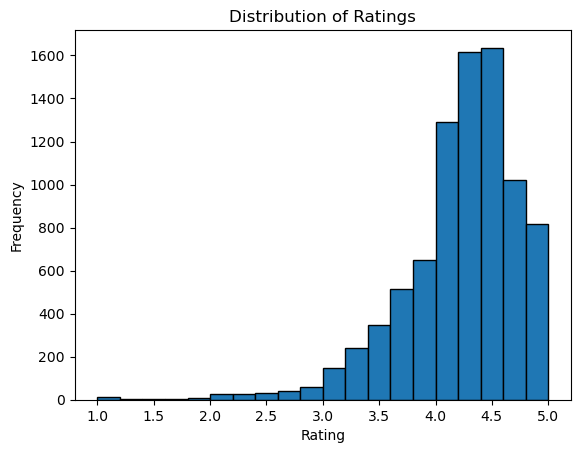

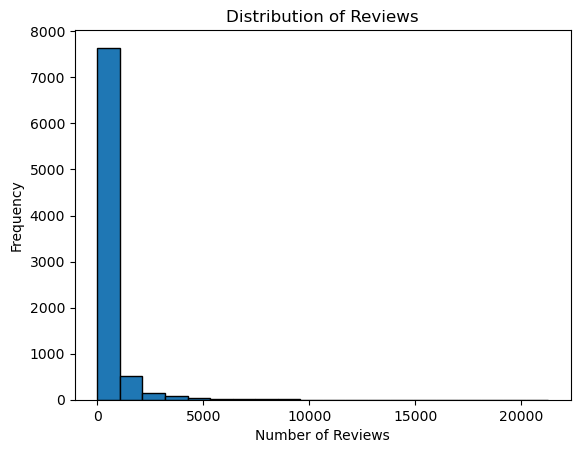

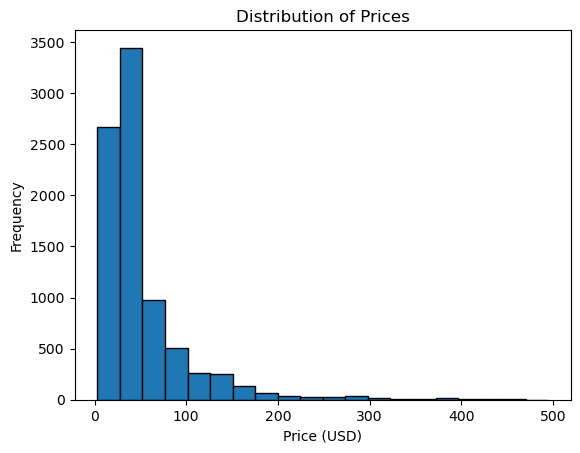

In [52]:
# Distribution of numerical features

# Histogram of 'rating' column
plt.hist(data_edited['rating'], bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Histogram of 'reviews' column
plt.hist(data_edited['reviews'], bins=20, edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews')
plt.show()

# Histogram of 'price_usd' column
plt.hist(data_edited['price_usd'], bins=20, edgecolor='black')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

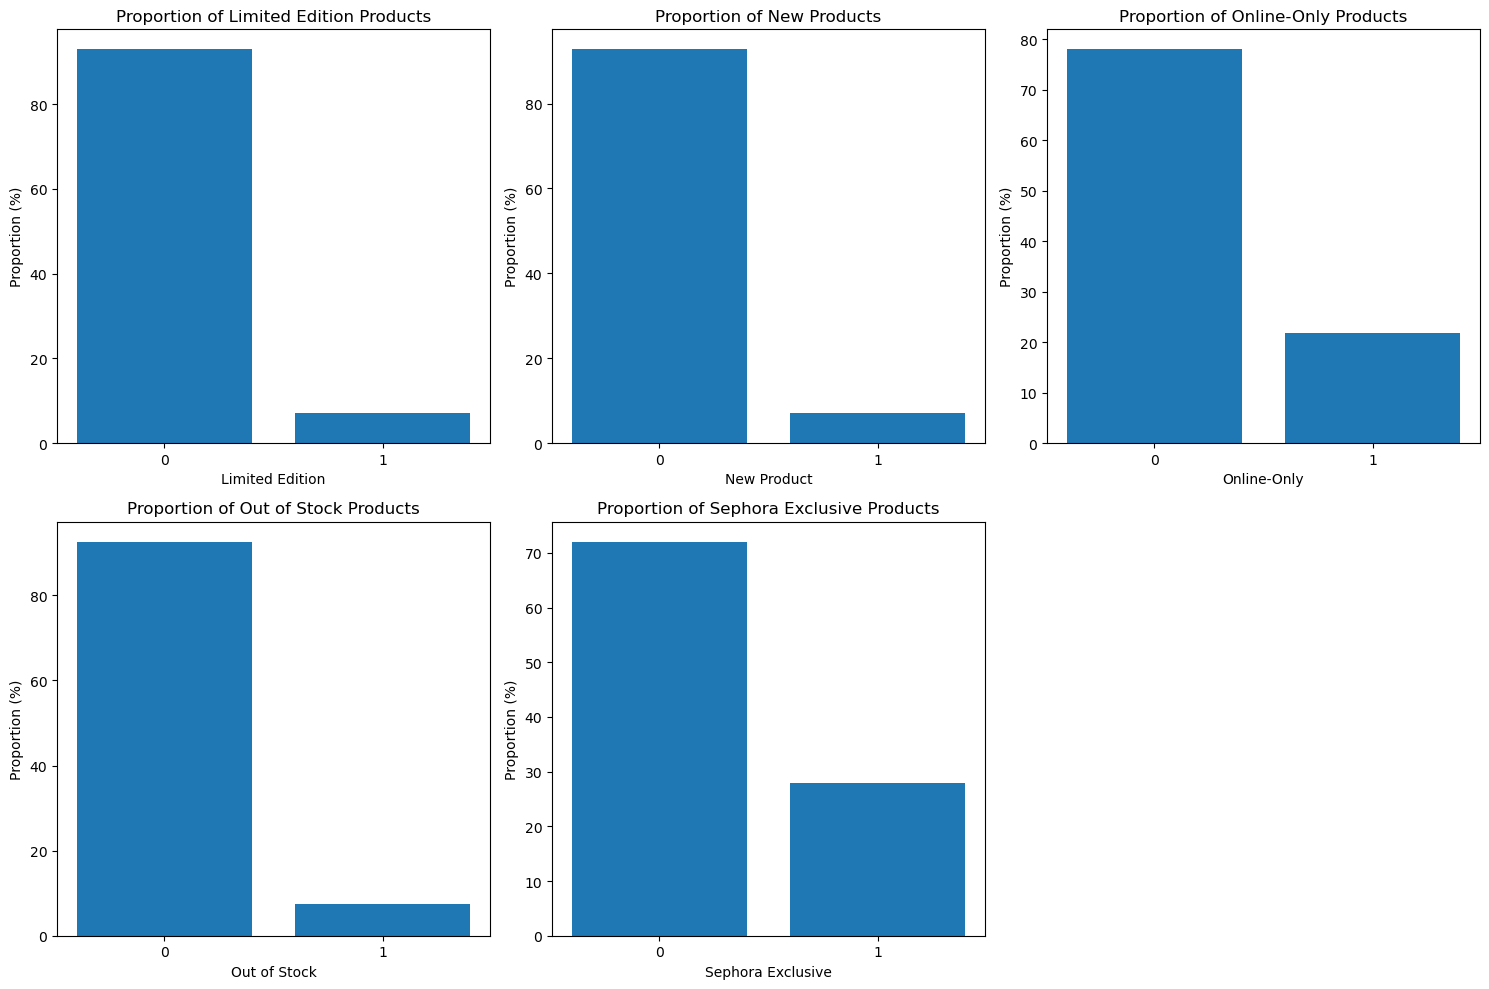

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Proportion of limited edition, new, online-only, out of stock, and Sephora exclusive products
limited_edition_counts = data_edited['limited_edition'].value_counts(normalize=True) * 100
new_counts = data_edited['new'].value_counts(normalize=True) * 100
online_only_counts = data_edited['online_only'].value_counts(normalize=True) * 100
out_of_stock_counts = data_edited['out_of_stock'].value_counts(normalize=True) * 100
sephora_exclusive_counts = data_edited['sephora_exclusive'].value_counts(normalize=True) * 100

# Plotting the proportions as bar plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Bar plot for limited edition
axs[0, 0].bar(limited_edition_counts.index, limited_edition_counts.values)
axs[0, 0].set_title("Proportion of Limited Edition Products")
axs[0, 0].set_xlabel("Limited Edition")
axs[0, 0].set_ylabel("Proportion (%)")

# Bar plot for new products
axs[0, 1].bar(new_counts.index, new_counts.values)
axs[0, 1].set_title("Proportion of New Products")
axs[0, 1].set_xlabel("New Product")
axs[0, 1].set_ylabel("Proportion (%)")

# Bar plot for online-only products
axs[0, 2].bar(online_only_counts.index, online_only_counts.values)
axs[0, 2].set_title("Proportion of Online-Only Products")
axs[0, 2].set_xlabel("Online-Only")
axs[0, 2].set_ylabel("Proportion (%)")

# Bar plot for out of stock products
axs[1, 0].bar(out_of_stock_counts.index, out_of_stock_counts.values)
axs[1, 0].set_title("Proportion of Out of Stock Products")
axs[1, 0].set_xlabel("Out of Stock")
axs[1, 0].set_ylabel("Proportion (%)")

# Bar plot for Sephora exclusive products
axs[1, 1].bar(sephora_exclusive_counts.index, sephora_exclusive_counts.values)
axs[1, 1].set_title("Proportion of Sephora Exclusive Products")
axs[1, 1].set_xlabel("Sephora Exclusive")
axs[1, 1].set_ylabel("Proportion (%)")

# Removing the empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()


#### INTERPRETATION:

Most products aren't "Limited Edition" or "New".

About 1 in 5 products are "Out of Stock".

Roughly 1 in 3 products are "Sephora Exclusive".

A quarter of the products are sold "Online-Only".

In short, most products are regular items, with a few being exclusive to Sephora or online-only.

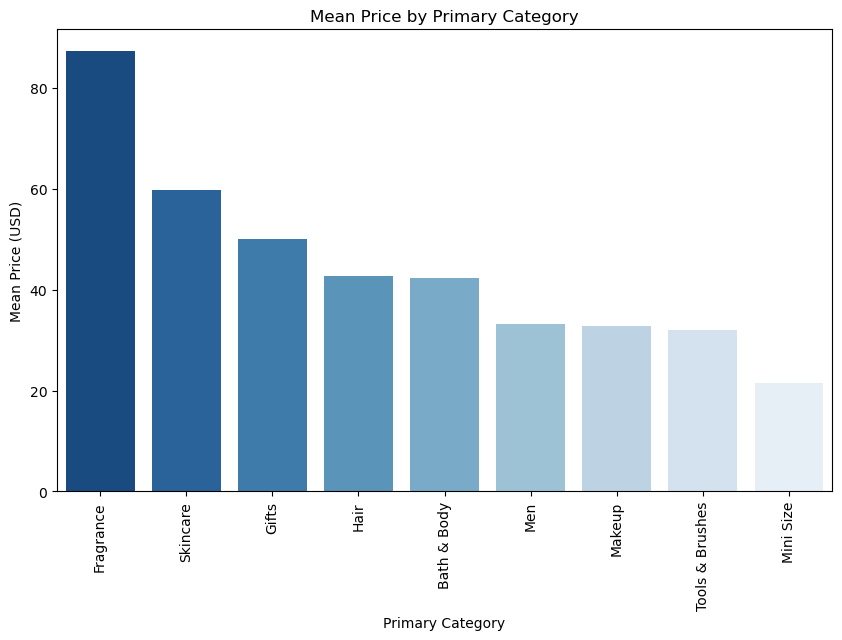

In [54]:
mean_price_by_category = data_edited.groupby('primary_category')['price_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_by_category.index, y=mean_price_by_category.values, palette='Blues_r')
plt.xlabel('Primary Category')
plt.ylabel('Mean Price (USD)')
plt.title('Mean Price by Primary Category')
plt.xticks(rotation=90)
plt.show()



#### INTERPRETATION:

The graph shows the average price of products for different categories at Sephora. "Fragrance" has the highest average price, while "Mini Size" items have the lowest average price.

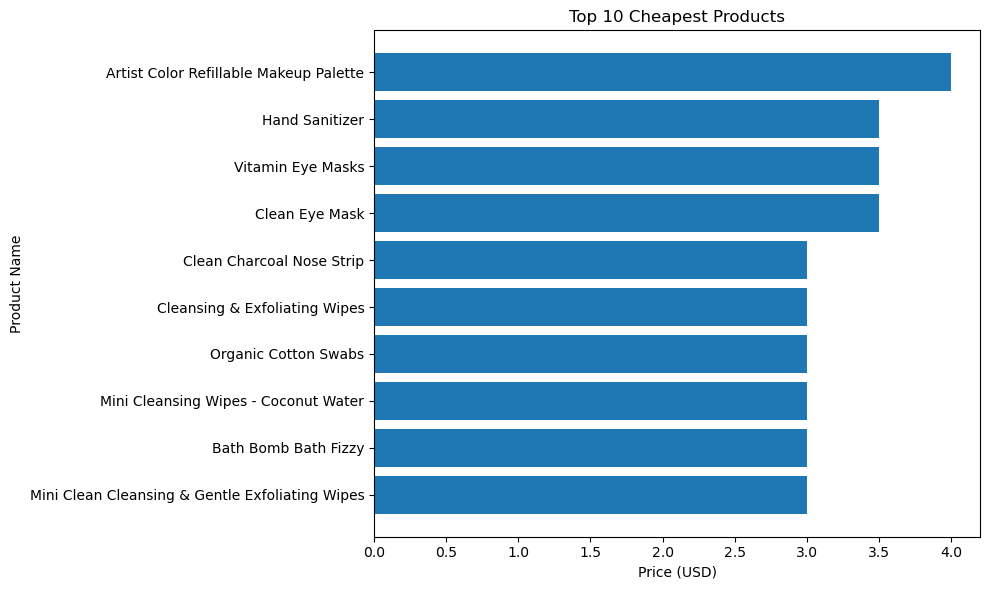

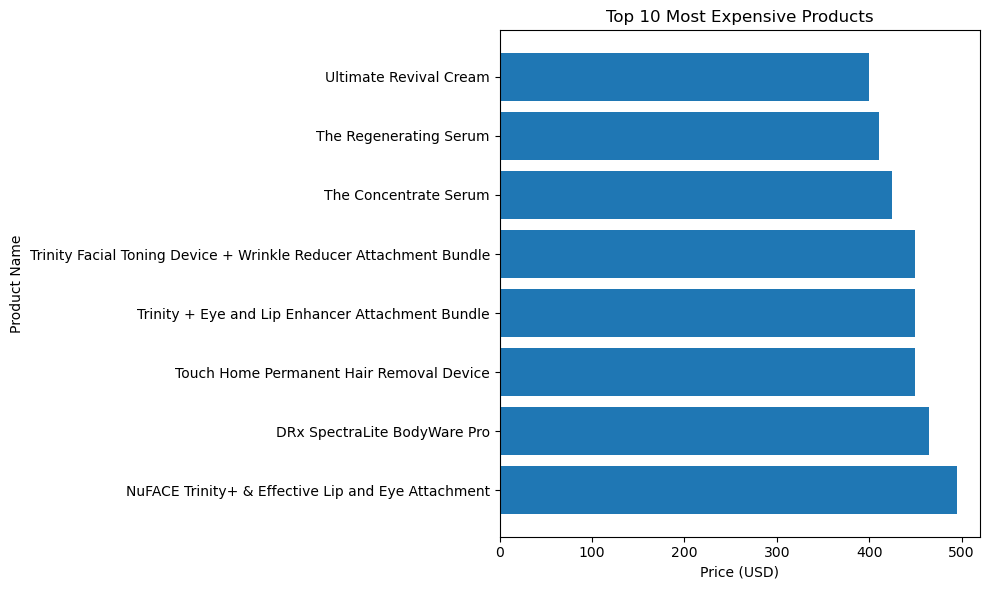

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data_edited'

# Sort the DataFrame by 'price_usd' in ascending order to get cheapest products first
cheapest_products = data_edited.sort_values(by='price_usd').head(10)

# Sort the DataFrame by 'price_usd' in descending order to get most expensive products first
expensive_products = data_edited.sort_values(by='price_usd', ascending=False).head(10)

# Create a bar chart for the top 10 cheapest products
plt.figure(figsize=(10, 6))
plt.barh(cheapest_products['product_name'], cheapest_products['price_usd'])
plt.title('Top 10 Cheapest Products')
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Create a bar chart for the top 10 most expensive products
plt.figure(figsize=(10, 6))
plt.barh(expensive_products['product_name'], expensive_products['price_usd'])
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


#### INTERPRETATION:

The graphs display the top 10 cheapest and most expensive products at Sephora.

Cheapest Products: Items like "Hand Sanitizer" and "Clean Eye Mask" are among the least expensive, with prices under $4.
Most Expensive Products: Products like "Ultimate Revival Cream" and "The Regenerating Serum" are among the priciest, costing several hundred dollars each.
In essence, Sephora offers a wide price range, from very affordable items to premium-priced products.

### EDA on Reviews Dataset

In [56]:
text_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   author_id                 1301136 non-null  object        
 1   rating                    1301136 non-null  int64         
 2   is_recommended            1301136 non-null  object        
 3   total_feedback_count      1301136 non-null  int64         
 4   total_neg_feedback_count  1301136 non-null  int64         
 5   total_pos_feedback_count  1301136 non-null  int64         
 6   submission_time           1301136 non-null  datetime64[ns]
 7   review_text               1301136 non-null  object        
 8   review_title              1301136 non-null  object        
 9   skin_tone                 1301136 non-null  object        
 10  eye_color                 1301136 non-null  object        
 11  skin_type                 1301136 non-null  object  

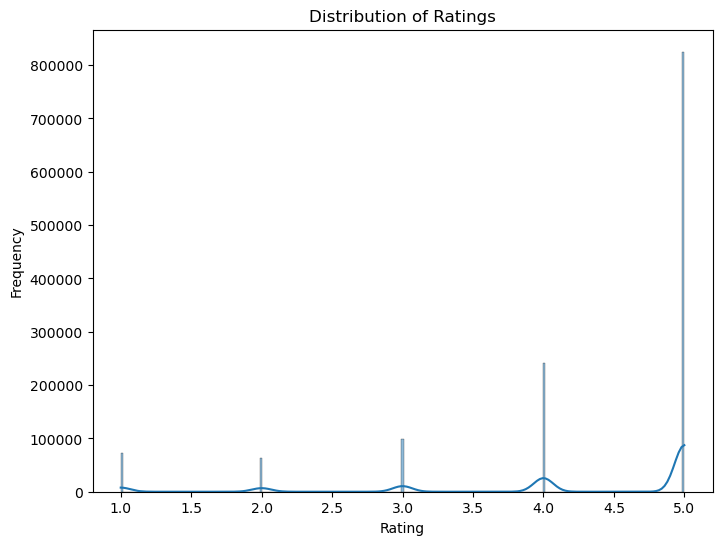

In [57]:
# Distribution plot of 'rating' column
plt.figure(figsize=(8, 6))
sns.histplot(text_edited['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


#### INTERPRETATION:

The graph showcases the distribution of product ratings:

A very small number of products received ratings around 1.0 to 3.0.
The majority of products received the highest rating of 5.0.
In essence, most products at Sephora have been highly rated by customers.

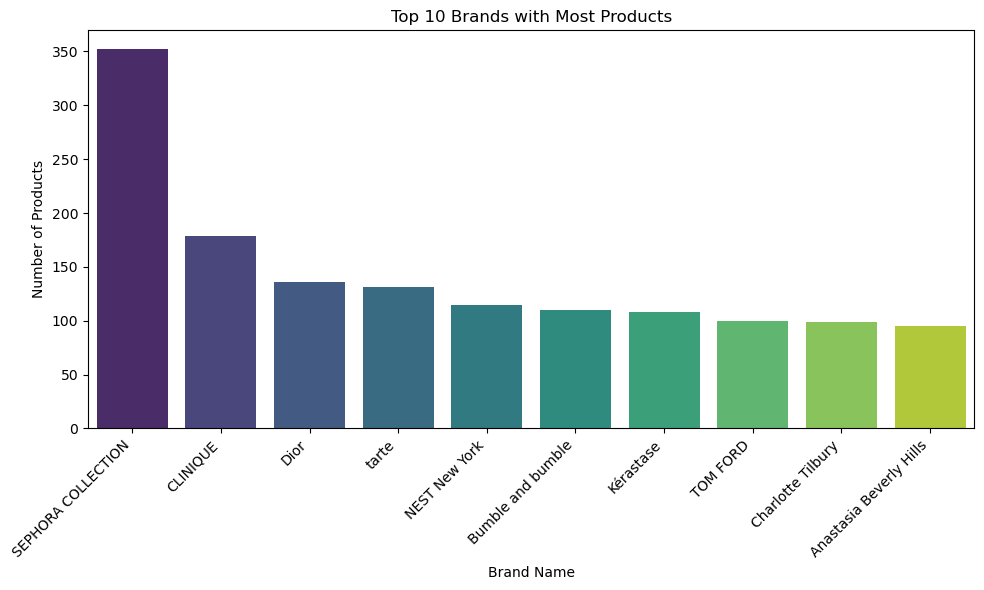

In [58]:
top_brands = data['brand_name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products')
plt.title('Top 10 Brands with Most Products')
plt.tight_layout()
plt.show()


#### INTERPRETATION:

The chart showcases the top 10 brands with the most products on Sephora.

SEPHORA COLLECTION has the highest number, over 300 products.
CLINIQUE comes second with around 250 products.
Brands like Dior, tarte, and NEST New York have between 100 to 200 products.
The remaining brands, including TOM FORD and Charlotte Tilbury, offer 50 to 100 products each.

In essence, SEPHORA COLLECTION dominates in product variety, but several other brands also have a strong presence.

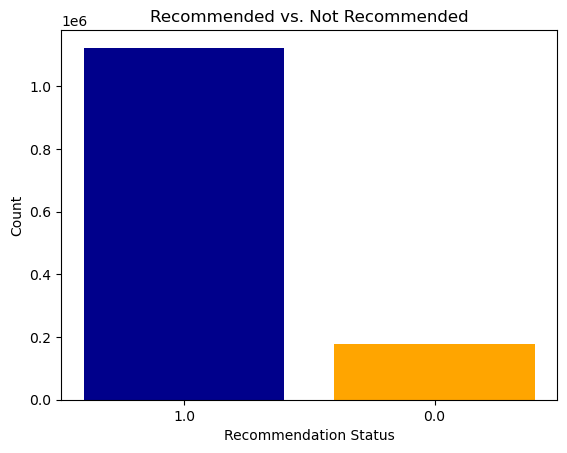

In [59]:

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'text_edited'
# If your dataset is in a CSV file, you can read it using pd.read_csv('filename.csv')

# Step 1: Count occurrences of each value in 'is_recommended' column
recommended_counts = text_edited['is_recommended'].value_counts()

# Step 2: Create the bar chart
plt.bar(recommended_counts.index, recommended_counts.values, color=['darkblue', 'orange'])

plt.xlabel('Recommendation Status')
plt.ylabel('Count')
plt.title('Recommended vs. Not Recommended')
plt.show()


The visualization titled "Recommended vs. Not Recommended" provides a clear comparison of the count of products that have been recommended versus those that haven't.

#### INTERPRETATION:

A vast majority of products have been recommended, as indicated by the tall blue bar. This suggests that most users or reviewers had a positive experience with the products and found them satisfactory.

A significantly smaller number of products were not recommended, as shown by the shorter orange bar. This indicates that a lesser number of users had reservations or were not entirely satisfied with these products.

In summary, the visualization underscores a predominantly positive reception for products, with a small fraction not meeting the users' expectations or requirements.

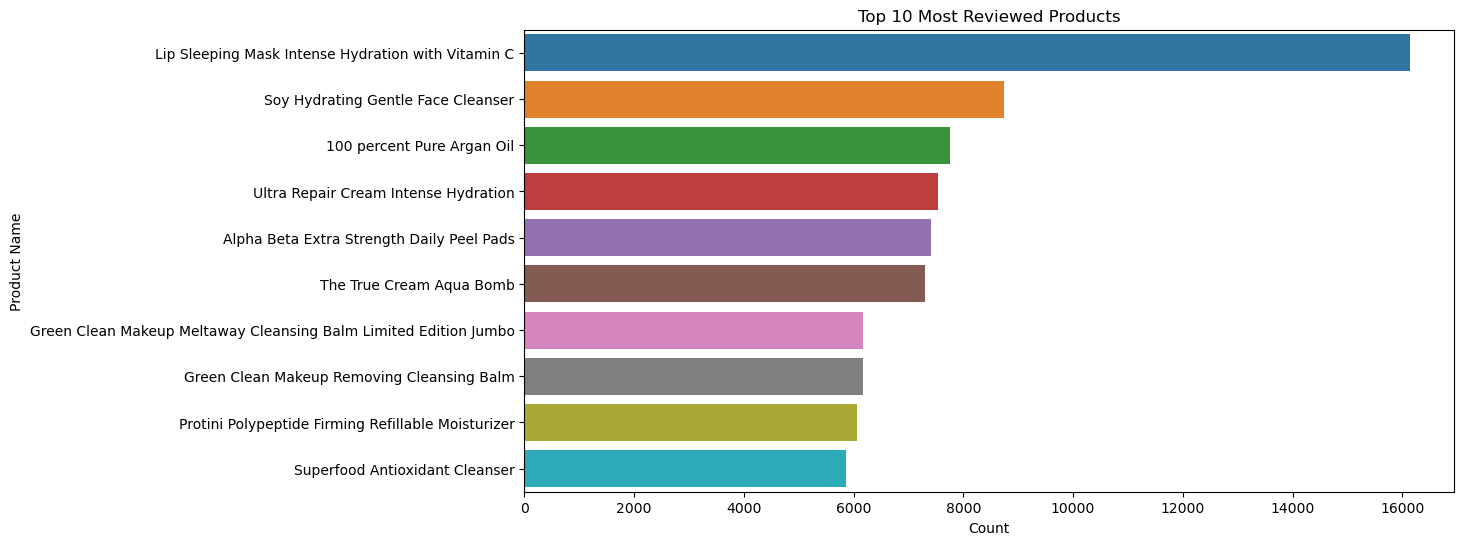

In [60]:
# Count of products by 'product_name'
plt.figure(figsize=(12, 6))
sns.barplot(y=text_edited['product_name'].value_counts().nlargest(10).index, x=text_edited['product_name'].value_counts().nlargest(10).values, orient='h')
plt.ylabel('Product Name')
plt.xlabel('Count')
plt.title('Top 10 Most Reviewed Products')
plt.show()


#### INTERPRETATION:

The graph displays the top 10 products with the highest number of reviews. The "Lip Sleeping Mask Intense Hydration with Vitamin C" has the most reviews, followed by other products in decreasing order.

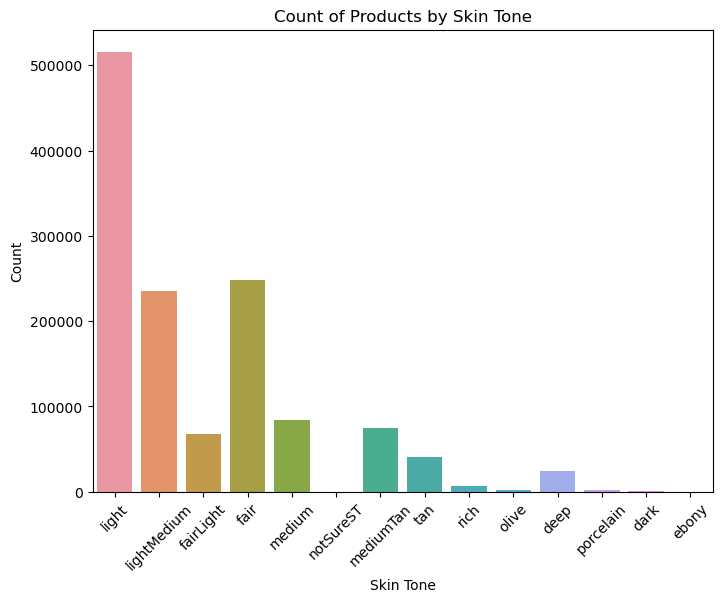

In [61]:
# Count of Products by Skin Tone
plt.figure(figsize=(8, 6))
sns.countplot(x='skin_tone', data=text_edited)
plt.xlabel('Skin Tone')
plt.ylabel('Count')
plt.title('Count of Products by Skin Tone')
plt.xticks(rotation=45)
plt.show()

#### INTERPRETATION:

The graph illustrates the count of products based on different skin tones. "Light" skin tone products have the highest count, followed by "light/medium" and "medium" skin tones. Other skin tones have comparatively fewer products.

# STATISTICAL TESTS:

### Test for Collinearity:

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")

# Calculate Pearson correlation coefficients for numerical variables
numerical_vars = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
correlation_matrix = data[numerical_vars].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            rating  total_feedback_count  \
rating                    1.000000             -0.080300   
total_feedback_count     -0.080300              1.000000   
total_neg_feedback_count -0.182179              0.674619   
total_pos_feedback_count -0.049147              0.984976   
price_usd                -0.002616              0.008143   

                          total_neg_feedback_count  total_pos_feedback_count  \
rating                                   -0.182179                 -0.049147   
total_feedback_count                      0.674619                  0.984976   
total_neg_feedback_count                  1.000000                  0.537009   
total_pos_feedback_count                  0.537009                  1.000000   
price_usd                                 0.007682                  0.007508   

                          price_usd  
rating                    -0.002616  
total_feedback_count       0.008143  
total_neg_feedback_count

#### INTERPRETATION:

Products with higher ratings tend to have fewer negative feedbacks.

Products with more total feedback also have more positive and negative feedback.

Price doesn't show a clear relationship with ratings or feedback counts.

Basically, well-rated products get fewer negative comments, and popular products (with lots of feedback) have both more likes and dislikes. Product prices don’t seem to affect ratings or the number of comments much.

### Chi-Square Test:

In [64]:
from scipy.stats import chi2_contingency

# Create a contingency table for two categorical variables
contingency_table = pd.crosstab(data['is_recommended'], data['skin_type'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test - Chi2-statistic:", chi2_stat)
print("Chi-Square Test - P-value:", p_value)

Chi-Square Test - Chi2-statistic: 1923.860016218833
Chi-Square Test - P-value: 0.0


#### INTERPRETATION:

The Chi-Square test was performed to check if there's a relationship between the recommendation status ('is_recommended') of a product and the skin type of users ('skin_type').

With a Chi2-statistic value of 1923.86 and a p-value of 0.0, the results are statistically significant. This suggests that there is a strong association between whether a product is recommended and the skin type of the users. In other words, the likelihood of a product being recommended may vary depending on the skin type of the user.

### Chi-square Test for Independence:

In [65]:
from scipy.stats import chi2_contingency

# List of categorical predictors including 'rating'
categorical_predictors = ['rating', 'skin_tone', 'eye_color', 'skin_type', 'hair_color']

# Running chi-square test for each predictor against 'is_recommended'
for predictor in categorical_predictors:
    crosstab = pd.crosstab(data[predictor], data['is_recommended'])
    chi2, p, _, _ = chi2_contingency(crosstab)
    print(f"P-value for {predictor} vs. is_recommended:", p)

P-value for rating vs. is_recommended: 0.0
P-value for skin_tone vs. is_recommended: 0.0
P-value for eye_color vs. is_recommended: 0.0
P-value for skin_type vs. is_recommended: 0.0
P-value for hair_color vs. is_recommended: 0.0


#### INTERPRETATION:

All the p-values are 0.0, which means:

Rating, skin_tone, eye_color, skin_type, and hair_color each have a relationship with whether a product is recommended or not.

It's not just by random chance; there's a real association.

For example, products with higher ratings are more likely to be recommended. Similarly, people with different skin tones, eye colors, etc., might have varying preferences.

In short, all these factors play a role in whether a product gets recommended.

### Descriptive Statistics and Visualization:

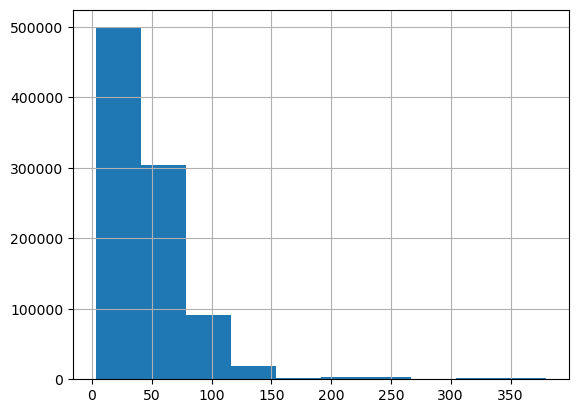

1.0    799381
0.0    124076
Name: is_recommended, dtype: int64


In [66]:
import matplotlib.pyplot as plt

data['price_usd'].hist()
plt.show()

print(data['is_recommended'].value_counts())

#### INTERPRETATION:

The histogram shows how product prices are spread out.

Most products, around 86.5%, are recommended by customers, while the rest are not.

In short, the majority of products get a thumbs-up from customers, and the histogram shows their pricing distribution.

### T-Test:

In [67]:
print(data['is_recommended'].unique())
print(data['is_recommended'].dtype)

[1. 0.]
float64


In [68]:
from scipy.stats import ttest_ind

# Split the data into two groups: recommended and not recommended
recommended_prices = data[data['is_recommended'] == 1]['price_usd']
not_recommended_prices = data[data['is_recommended'] == 0]['price_usd']

# Perform the t-test
t_stat, p_value = ttest_ind(recommended_prices, not_recommended_prices)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -2.9337376064389415
P-value: 0.0033491543629176807


#### INTERPRETATION:

The T-statistic value of -2.9337 suggests that there's a difference between the two groups, with the average price of the not-recommended products being higher than the recommended ones (since the value is negative).

The P-value is 0.0033, which is less than the typical significance level of 0.05. This means that the difference between the average prices of recommended and not-recommended products is statistically significant. In other words, the observed difference in the averages is likely not due to random chance.

In simple terms: The average price of products that aren't recommended is statistically higher than those that are recommended. make it simple 

### Relationship between product prices (in USD) and their ratings.

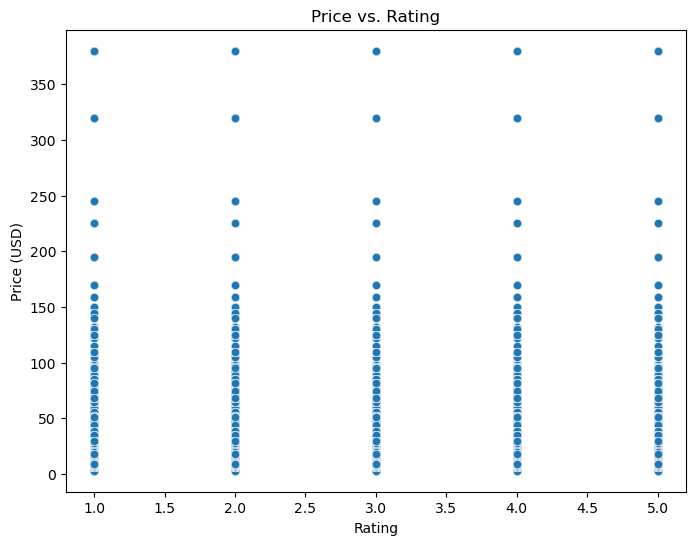

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='price_usd', data=data, alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Price (USD)')
plt.title('Price vs. Rating')
plt.show()

The graph shows the relationship between product prices (in USD) and their ratings.

#### INTERPRETATIONS:

Most products, regardless of their price, have a high rating (around 4 to 5).

There are some products with low ratings (1 to 2), but they are fewer in number.

Products with a wide range of prices can have similar high ratings.

Overall, there's no clear trend that higher-priced products have higher or lower ratings.

In [88]:
text_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   author_id                 1301136 non-null  object        
 1   rating                    1301136 non-null  int64         
 2   is_recommended            1301136 non-null  object        
 3   total_feedback_count      1301136 non-null  int64         
 4   total_neg_feedback_count  1301136 non-null  int64         
 5   total_pos_feedback_count  1301136 non-null  int64         
 6   submission_time           1301136 non-null  datetime64[ns]
 7   review_text               1301136 non-null  object        
 8   review_title              1301136 non-null  object        
 9   skin_tone                 1301136 non-null  object        
 10  eye_color                 1301136 non-null  object        
 11  skin_type                 1301136 non-null  object  

## Business Problem 1
### Is there a significant difference in average product prices between products that are recommended and those that are not?


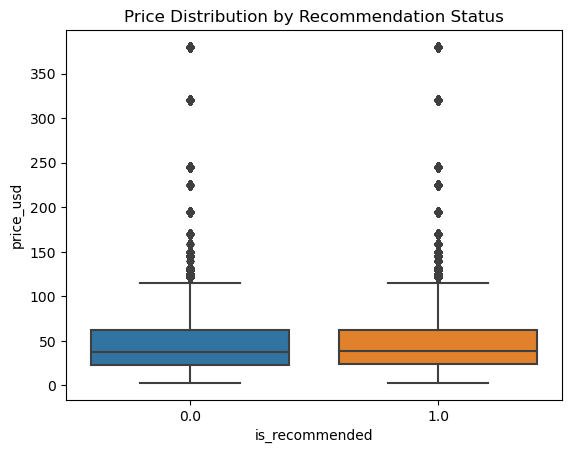

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to visualize price differences
sns.boxplot(x='is_recommended', y='price_usd', data=data)
plt.title("Price Distribution by Recommendation Status")
plt.show()


#### INTERPRETATION:

**Interpretation**:

From the box plot:

1. **Central Tendency**: The median (the line inside the box) price for products that are not recommended (is_recommended = 0.0) seems to be slightly higher than the median price for products that are recommended (is_recommended = 1.0).

2. **Spread**: Both categories have a similar interquartile range (IQR; the height of the box), which indicates that the middle 50% of prices for both categories span a similar range.

3. **Outliers**: There are several outliers in both categories. This means there are products with prices significantly higher than the majority. The recommended products seem to have a slightly higher density of outliers than the non-recommended ones.

4. **Range**: The range (from the lowest data point to the highest, excluding outliers) for recommended products appears slightly smaller than that for non-recommended products, although this might be influenced by the outliers.

**Analysis**:

1. While there seems to be a slight difference in the median price between recommended and non-recommended products, the difference does not appear substantial.

2. The presence of numerous outliers, especially in the recommended category, suggests that even though a product is priced much higher than others, it might still get recommended. This could imply that certain high-priced products offer value or quality that justifies their price.



## Solution to the Business Problem:


**Solution to the Business Problem**:

Given the data, the average price of a product does not seem to be a significant factor in determining whether it gets recommended or not. However, some nuances are worth noting:

1. **Product Value**: It would be beneficial for the business to investigate the high-priced outliers, especially in the recommended category. Understanding what makes these high-priced products worthy of recommendation could yield insights into what customers value.

2. **Quality over Price**: Ensure that product quality matches or exceeds its price point. A product being recommended despite its high price suggests that customers might be considering factors other than just cost when recommending a product. This underscores the importance of maintaining product quality, features, or brand reputation.

3. **Market Segmentation**: The presence of recommended products across a wide price range suggests a diverse customer base with varied purchasing power and preferences. Tailor marketing strategies accordingly. For instance, premium products can be targeted towards segments that value luxury or quality, while more affordable products can be marketed to budget-conscious segments.

4. **Further Analysis**: To statistically determine if there's a significant difference in average product prices between the two categories, you might consider performing a hypothesis test (e.g., a t-test) to compare the means of the two groups.

In conclusion, while price is a factor, it's not the only determinant for a product's recommendation status. The business should focus on understanding the inherent value each product provides and tailor its strategies accordingly.

## Business Problem 2

### "To launch a new marketing campaign, we want to identify which customer segments (based on features like skin tone, hair color, eye color) might be underrepresented or overly dissatisfied in our reviews. Identifying these groups will allow us to tailor our campaigns to these segments, ensuring they feel represented and addressing their specific concerns."

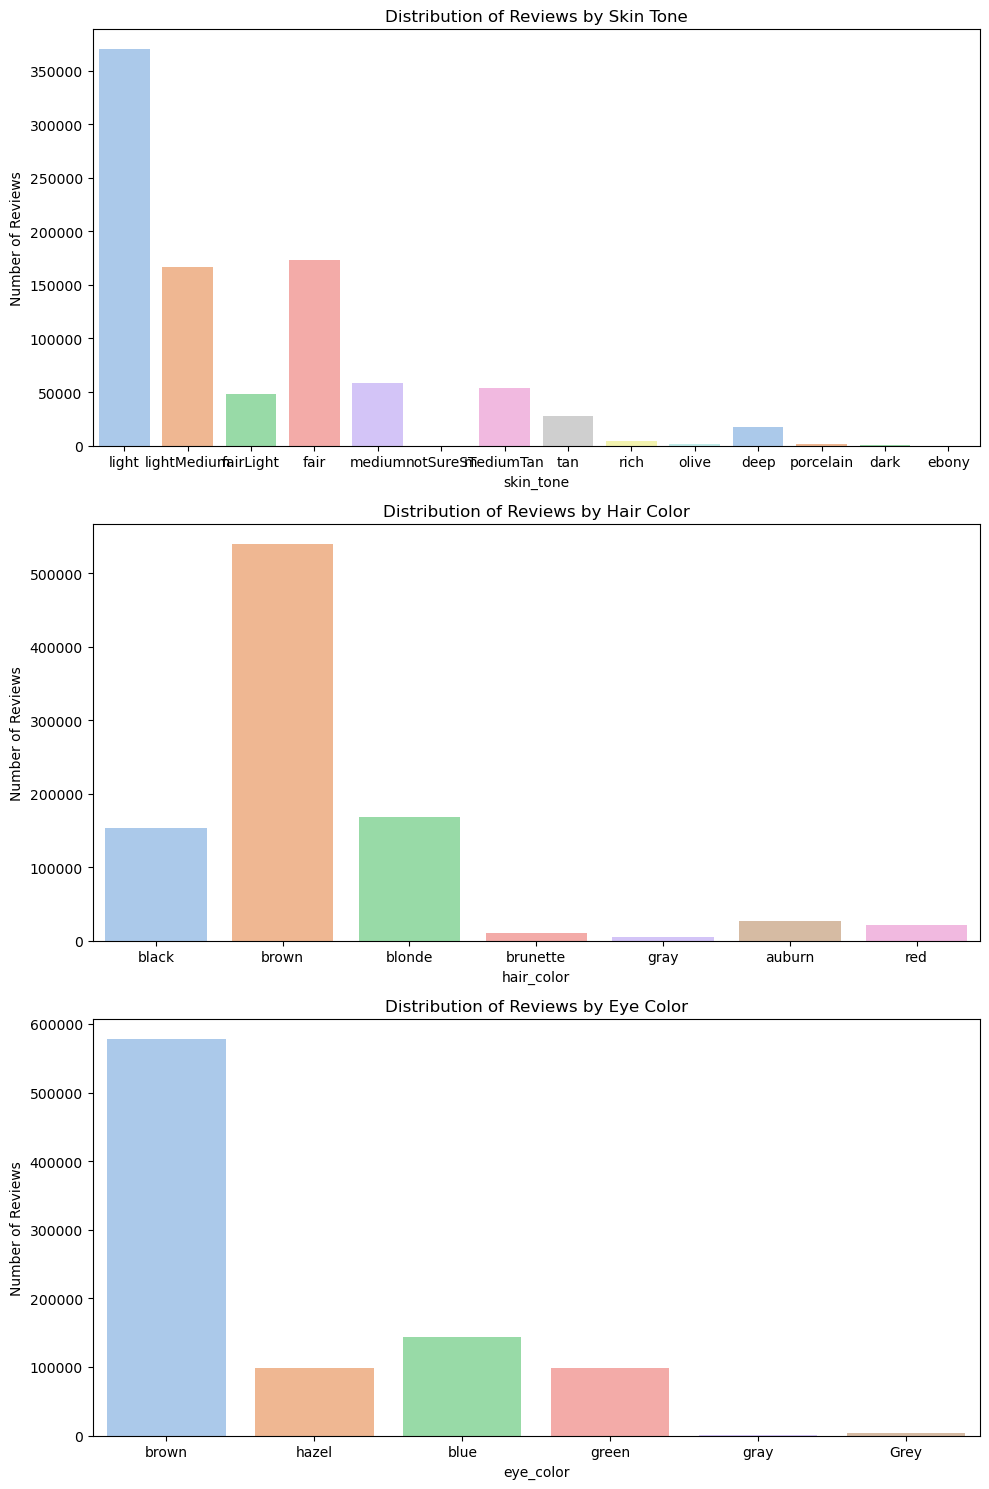

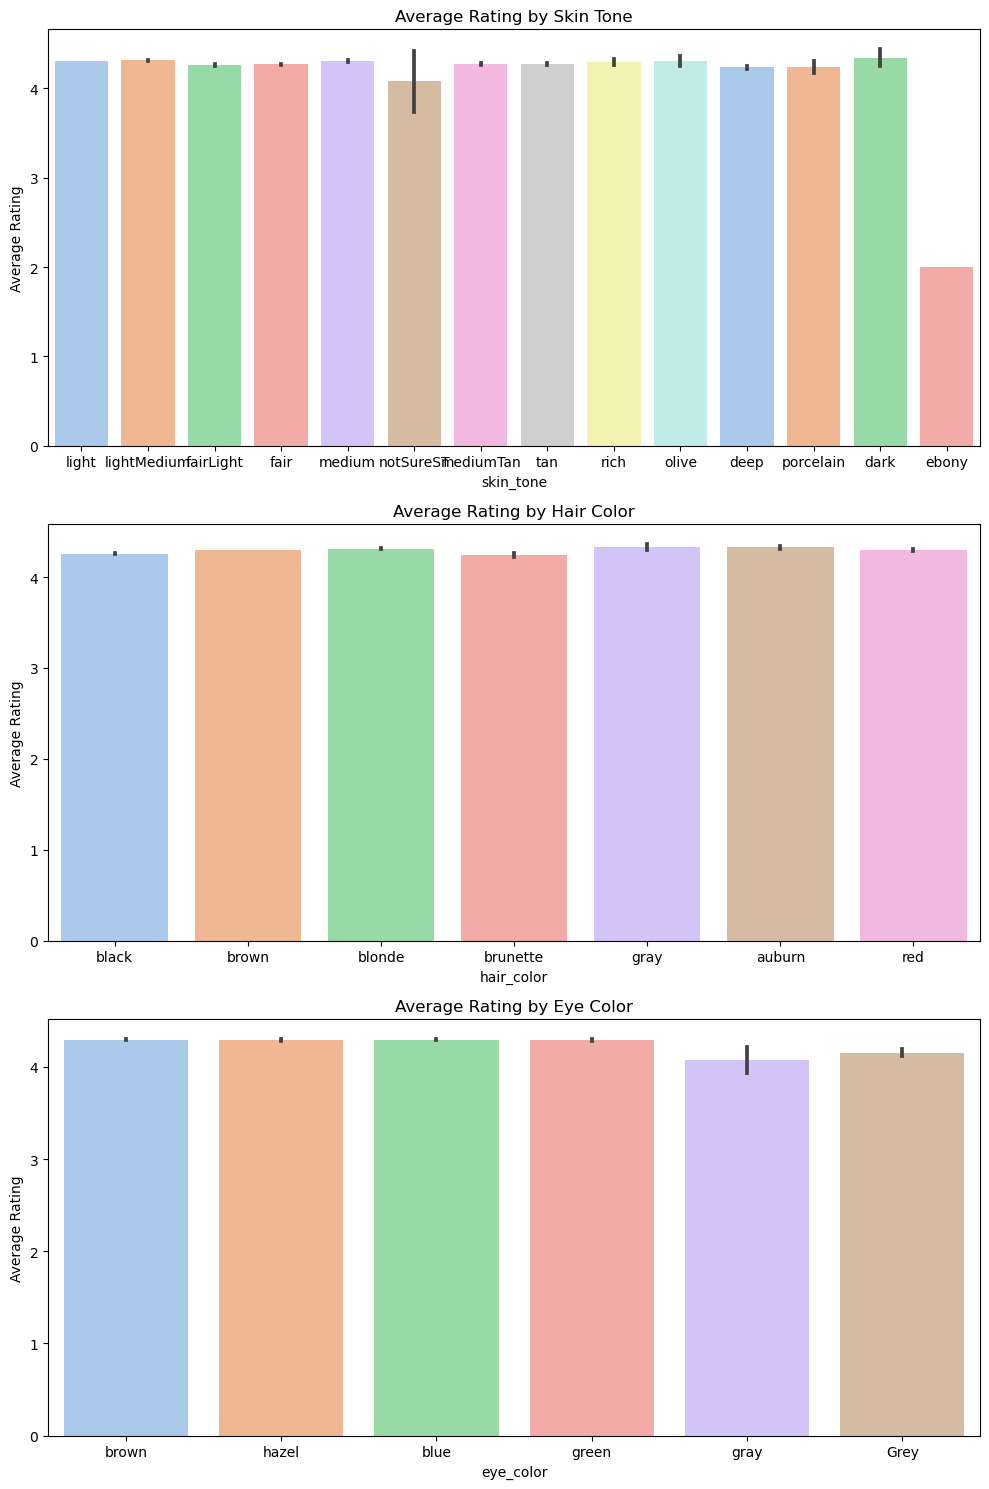

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of reviews based on skin tone, hair color, and eye color
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.countplot(x='skin_tone', data=data, ax=axes[0], palette='pastel')
axes[0].set_title('Distribution of Reviews by Skin Tone')
axes[0].set_ylabel('Number of Reviews')

sns.countplot(x='hair_color', data=data, ax=axes[1], palette='pastel')
axes[1].set_title('Distribution of Reviews by Hair Color')
axes[1].set_ylabel('Number of Reviews')

sns.countplot(x='eye_color', data=data, ax=axes[2], palette='pastel')
axes[2].set_title('Distribution of Reviews by Eye Color')
axes[2].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

# Average satisfaction (rating) for each segment
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.barplot(x='skin_tone', y='rating', data=data, ax=axes[0], palette='pastel')
axes[0].set_title('Average Rating by Skin Tone')
axes[0].set_ylabel('Average Rating')

sns.barplot(x='hair_color', y='rating', data=data, ax=axes[1], palette='pastel')
axes[1].set_title('Average Rating by Hair Color')
axes[1].set_ylabel('Average Rating')

sns.barplot(x='eye_color', y='rating', data=data, ax=axes[2], palette='pastel')
axes[2].set_title('Average Rating by Eye Color')
axes[2].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()


### INTERPRETATION:

**Interpretation:**

1. **Average Rating by Skin Tone:**
    - All skin tones, with the exception of "ebony," tend to have ratings that hover around the same range, between 3.5 to 4.
    - The "ebony" skin tone has a significantly lower average rating.

2. **Average Rating by Hair Color:**
    - All hair colors have relatively consistent ratings around 3.5 to 4, with no drastic differences.

3. **Average Rating by Eye Color:**
    - The average ratings for different eye colors are all relatively consistent and close, ranging between 3.5 to 4.

4. **Distribution of Reviews by Skin Tone:**
    - The majority of reviews come from customers identifying with "light" and "fair" skin tones.
    - There are fewer reviews from those identifying with "dark" and "ebony" skin tones.

5. **Distribution of Reviews by Hair Color:**
    - The bulk of reviews are from customers with "brown" and "blonde" hair.
    - There's a significant drop in the number of reviews from customers with other hair colors, such as "gray," "auburn," and "red."

6. **Distribution of Reviews by Eye Color:**
    - Most reviews come from customers with "brown" eyes, followed by those with "blue" and "green" eyes. Other eye colors have fewer reviews.



## Solution to the Business Problem:



1. **Targeting Underrepresented Groups:**
    - The company should focus on campaigns that resonate with customers identifying with "dark" and "ebony" skin tones, as they're underrepresented in the review data. This can be done by including models with these skin tones in advertising or introducing products catering specifically to their needs.

2. **Addressing Dissatisfaction:**
    - Given the noticeably lower average rating from customers with the "ebony" skin tone, the company should consider conducting further research to understand their concerns and address them. This might involve product improvements, launching new products, or adjusting marketing messages.

3. **Expanding Representation:**
    - The company should ensure broader representation in their marketing materials, not just focusing on the predominant "light" and "fair" skin tones or the "brown" and "blonde" hair colors. Highlighting diversity can make a wider range of customers feel acknowledged and represented.

4. **Feedback Collection:**
    - Engage with customers from underrepresented segments through surveys or focus groups to better understand their needs and preferences.

5. **Diverse Influencers:**
    - Partner with influencers who resonate with these underrepresented groups to broaden reach and engagement.

6. **Product Development:**
    - Ensure that the product range caters to the diverse needs of all customers, especially those that might be underrepresented in the current review dataset. This can include shades of makeup, types of hair products, etc.

7. **Educational Content:**
    - Offer content that educates and guides customers on how to use products specifically designed for their skin tone, hair color, or eye color. This will not only address concerns but also help in boosting product confidence among these segments.

By addressing the needs of underrepresented and potentially dissatisfied segments, the company can foster greater brand loyalty, improve customer satisfaction, and potentially tap into a broader customer base.

## Business Problem 3

### "Are higher-priced products generally rated better than lower-priced products? We want to understand if pricing correlates with perceived product quality based on reviews."

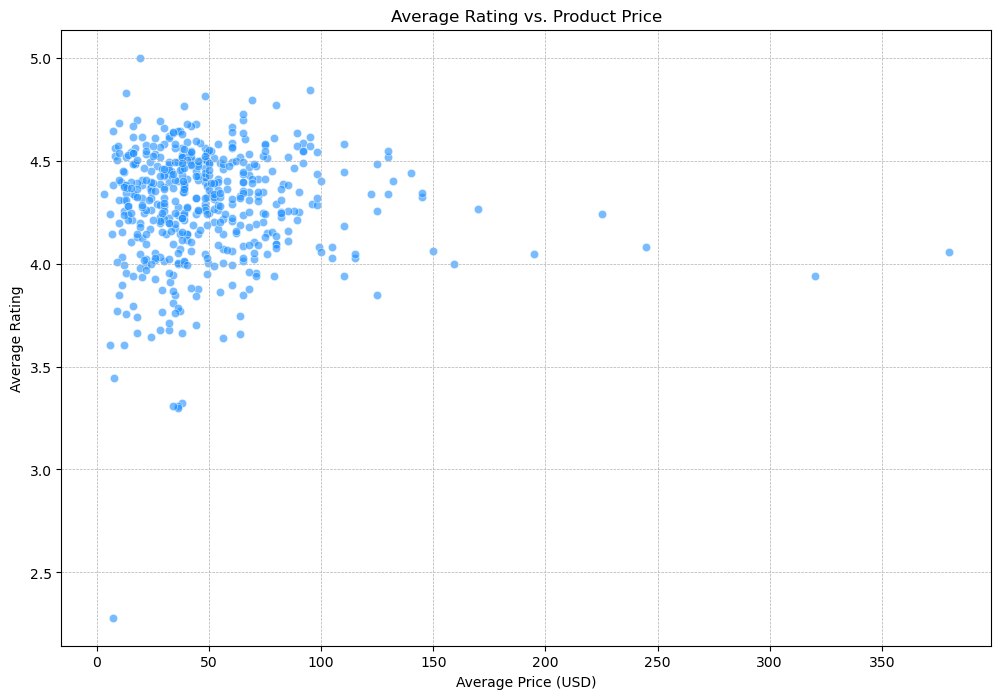

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating for each product
product_avg_ratings = data.groupby('product_id')['rating'].mean()

# Calculate average price for each product (it should be the same across all reviews, but taking an average for consistency)
product_avg_prices = data.groupby('product_id')['price_usd'].mean()

# Merge the two series into a DataFrame
product_info = pd.DataFrame({'avg_rating': product_avg_ratings, 'avg_price': product_avg_prices}).reset_index()

# Scatter plot for price vs average rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_price', y='avg_rating', data=product_info, alpha=0.6, color='dodgerblue')
plt.title('Average Rating vs. Product Price')
plt.xlabel('Average Price (USD)')
plt.ylabel('Average Rating')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


#### INTERPRETATION:

The scatter plot visualizes the relationship between product prices (Average Price in USD) and their corresponding average ratings (Average Rating). Here's what we can observe:

1. **Concentration of Data Points**: Most products, irrespective of their price, have an average rating between 4.0 to 4.5. This indicates that a majority of products, regardless of their price, tend to receive favorable reviews.

2. **Price Range Distribution**: A significant concentration of products is priced below $100, with their average ratings mostly above 4.0. There are fewer data points as the price increases, indicating there are fewer higher-priced products in this dataset.

3. **Higher-priced Products**: Products priced above $200 have ratings spread out between 4.0 to 5.0, but given the sparse data points in this range, it's challenging to make a definitive judgment about the correlation between high price and high ratings.

4. **Outliers**: There are a few products below $50 with ratings around 3.0 to 3.5. These could be considered as lower-priced products with relatively low ratings.




## Solution to the Business Problem:

Based on the analysis, the following conclusions and recommendations can be drawn:

1. **Weak Correlation**: There isn't a strong correlation between product price and average rating. While higher-priced products aren't necessarily rated poorly, they don't consistently receive better ratings than lower-priced products either.

2. **Price is Not the Only Factor**: Quality perception isn't solely based on price. Other factors such as product utility, brand reputation, marketing, and actual product quality play roles in determining ratings.

3. **Focus on Product Quality and Value**: Companies should continue to emphasize product quality and the value proposition to consumers, as these are likely significant drivers of positive reviews.

4. **Further Research**: A deeper analysis could be done using statistical tools to determine the strength and significance of the correlation. It might also be worth exploring other factors like product category, brand, or specific product features to better understand the drivers of ratings.

In summary, while there's a general trend of good ratings across different price points, the data does not strongly support the notion that higher-priced products are consistently rated better than lower-priced ones. Businesses should focus on providing genuine value to their customers to achieve favorable reviews.

## Business Problem 4:

### Which products have the highest counts of negative feedback? The aim is to pinpoint products that might require quality enhancements or more targeted marketing strategies to address the specific needs of different customer segments.

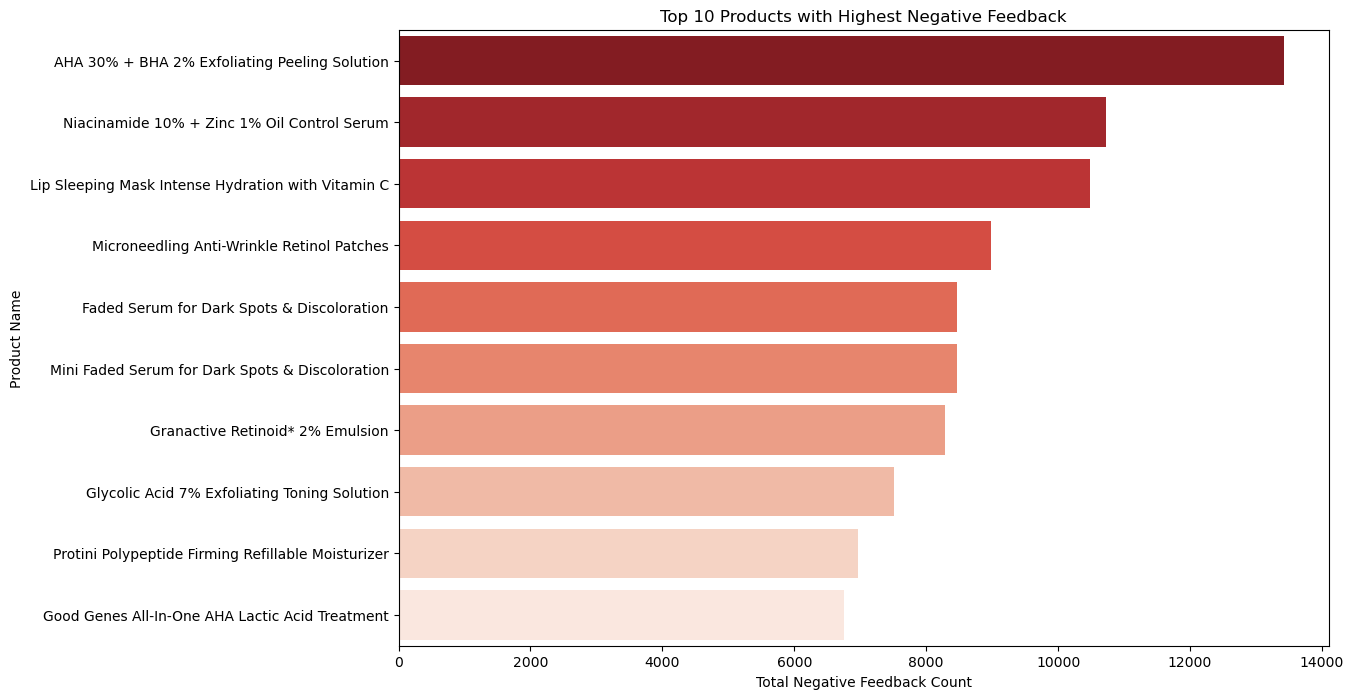

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product name and sum the total negative feedback
negative_feedback_summary = text_edited.groupby('product_name')['total_neg_feedback_count'].sum().sort_values(ascending=False)

# Extract the top 10 products with the highest negative feedback
top_negative_products = negative_feedback_summary.head(10)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(y=top_negative_products.index, x=top_negative_products.values, palette='Reds_r')
plt.title('Top 10 Products with Highest Negative Feedback')
plt.xlabel('Total Negative Feedback Count')
plt.ylabel('Product Name')
plt.show()


#### INTERPRETATION:

The bar chart presents the "Top 10 Products with Highest Negative Feedback" based on the count of negative feedback received. From the graph, we can observe the following:

1. **Leading Product**: The "AHA 30% + BHA 2% Exfoliating Peeling Solution" tops the list with the highest count of negative feedback, nearing 14,000.

2. **Range of Feedback**: There's a noticeable difference between the first product and the rest. The second product, "Niacinamide 10% + Zinc 1% Oil Control Serum," has a count around 10,000, which is significantly lower than the first, indicating a steeper drop in negative feedback.

3. **Products with Similar Feedback**: From the third to the seventh product, the difference in feedback count is relatively minor, suggesting that these products have comparable levels of dissatisfaction among customers.

4. **Decreasing Feedback Counts**: From the eighth product onwards, there is a consistent decline in negative feedback count, with "Good Genes All-In-One AHA Lactic Acid Treatment" receiving the least negative feedback among the top 10.


## Solution to the Business Problem:


Based on the chart's insights, the following conclusions and recommendations can be proposed:

1. **Product Investigation**: The "AHA 30% + BHA 2% Exfoliating Peeling Solution" should be closely examined to understand the reasons for such high negative feedback. It could be due to the product's effects, its marketing, or other external factors. 

2. **Feedback Analysis**: Analyze the actual content of the negative feedback for these products. Are there common themes or specific issues frequently mentioned? This can guide the quality enhancement efforts.

3. **Segmented Marketing**: For products with high negative feedback, consider segmenting the market to identify which customer groups are most dissatisfied. Tailored marketing campaigns can then address the specific concerns of these segments.

4. **Quality Enhancements**: Based on the feedback, determine if product reformulation or redesign is needed. This can help in addressing the primary concerns of the users.

5. **Communication Strategy**: If the negative feedback stems from misconceptions or improper use of the product, there might be a need for better communication, including clearer instructions or more informative marketing campaigns.

6. **Engage with Customers**: Companies can engage with customers who have given negative feedback to understand their concerns better and to potentially offer solutions or incentives for a second chance at a positive experience.

In conclusion, addressing negative feedback is essential not just for product improvement but also for maintaining brand reputation. By analyzing and acting on the feedback, companies can ensure that they meet their customers' expectations and maintain their loyalty.

## Business Problem 5:

 ### In today's digital era, where customer reviews and recommendations greatly influence purchasing behavior, understanding and anticipating customer sentiment is crucial. For a global beauty and skincare retailer like Sephora, every product recommendation, or lack thereof, can significantly impact sales, brand perception, and customer loyalty.

 ### At the heart of this challenge lies a critical question: Can we predict if a customer will recommend a product based on their interactions, ratings, and feedback? And if so, how can such predictions shape Sephora's strategic decisions, from product placements, inventory management, to marketing campaigns?

In [74]:
# Calculate class distribution
class_distribution = data['is_recommended'].value_counts()

# Calculate class proportions
class_proportions = class_distribution / class_distribution.sum()

print("Class Proportions:")
print(class_proportions)


Class Proportions:
1.0    0.86564
0.0    0.13436
Name: is_recommended, dtype: float64


In [75]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [76]:
data['submission_time'] = pd.to_datetime(data['submission_time'])


In [77]:
text_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   author_id                 1301136 non-null  object        
 1   rating                    1301136 non-null  int64         
 2   is_recommended            1301136 non-null  object        
 3   total_feedback_count      1301136 non-null  int64         
 4   total_neg_feedback_count  1301136 non-null  int64         
 5   total_pos_feedback_count  1301136 non-null  int64         
 6   submission_time           1301136 non-null  datetime64[ns]
 7   review_text               1301136 non-null  object        
 8   review_title              1301136 non-null  object        
 9   skin_tone                 1301136 non-null  object        
 10  eye_color                 1301136 non-null  object        
 11  skin_type                 1301136 non-null  object  

In [78]:
correlation = data['rating'].corr(data['price_usd'])
print("Correlation between rating and price_usd:", correlation)


Correlation between rating and price_usd: -0.0026157697373409665


The correlation value of 
−
0.0026
−0.0026 between rating and price_usd is very close to 0. This indicates that there's a negligible linear relationship between the two variables in the dataset.

In practical terms, this suggests that the price_usd of a product has almost no linear effect on its rating. The rating of a product is not increasing or decreasing significantly with its price.

# Machine Learning Model

## Classification Model - Predicting Product Recommendation:

### "Enhancing Brand Trust and Customer Loyalty through Predictive Analysis of Product Recommendations at Sephora"

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset

# Selecting features for classification
features_classification = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
X_classification = data[features_classification]
y_classification = data['is_recommended']

# Splitting data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Building the Random Forest Classifier model
model_classification = RandomForestClassifier(random_state=42)
model_classification.fit(X_train_classification, y_train_classification)

# Making predictions on the test set
y_pred_classification = model_classification.predict(X_test_classification)

# Evaluating the classification model
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Model - Accuracy:", accuracy_classification)
print(classification_report(y_test_classification, y_pred_classification))


Classification Model - Accuracy: 0.9452927035280358
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.81     24837
         1.0       0.98      0.96      0.97    159855

    accuracy                           0.95    184692
   macro avg       0.87      0.90      0.89    184692
weighted avg       0.95      0.95      0.95    184692



In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset

# Selecting features for classification
features_classification = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
X_classification = data[features_classification]
y_classification = data['is_recommended']

# Splitting data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Building the Random Forest Classifier model
model_classification = RandomForestClassifier(random_state=42)
model_classification.fit(X_train_classification, y_train_classification)

# Making predictions on the test set
y_pred_classification = model_classification.predict(X_test_classification)

# Evaluating the classification model
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Model - Accuracy:", accuracy_classification)
print(classification_report(y_test_classification, y_pred_classification))

# Interpreting the Results
# Analyze the classification report and feature importance

# Hyperparameter Tuning
# You can use techniques like grid search or randomized search to find optimal hyperparameters

# Feature Importance
feature_importance = model_classification.feature_importances_
print("Feature Importance:", feature_importance)

# Model Deployment (if desired)
# Deploy the model in a practical application if it meets your requirements

# Monitoring and Maintenance (if deployed)
# Monitor the model's performance and retrain as needed

# Iterative Improvement (if necessary)
# Refine the model by iterating on data preprocessing, feature selection, or trying different algorithms


Classification Model - Accuracy: 0.9452927035280358
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.81     24837
         1.0       0.98      0.96      0.97    159855

    accuracy                           0.95    184692
   macro avg       0.87      0.90      0.89    184692
weighted avg       0.95      0.95      0.95    184692

Feature Importance: [0.8016889  0.03336477 0.04747366 0.02108383 0.09638885]


#### INTERPRETATIONS:
   In summary, while our model has a high overall accuracy, it's important to pay attention to its performance on both classes, especially the minority class. Depending on our specific goals and the consequences of misclassification, you may need to take additional steps to address the class imbalance and improve the model's ability to correctly classify both recommended and not recommended reviews.

#  Resampling Techniques

Handling Imbalanced Data:

Using SMOTE for oversampling:

In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_classification, y_train_classification)


#### INTERPRETATIONS:

SMOTE to tackle the problem of having too many of one class and too few of another in your training data.

SMOTE creates new, synthetic samples of the minority class (the class with fewer samples) to balance the dataset.

#### By using SMOTE:

We're trying to make your model perform better for both classes by having equal samples of each class in the training data.
We've only applied it to the training data, so your test data remains untouched.
While this can improve performance, sometimes it can also add noise since the new samples are artificially created.
In short: We're using SMOTE to balance your classes in the training set to help your model predict better.

In [83]:
text_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   author_id                 1301136 non-null  object        
 1   rating                    1301136 non-null  int64         
 2   is_recommended            1301136 non-null  object        
 3   total_feedback_count      1301136 non-null  int64         
 4   total_neg_feedback_count  1301136 non-null  int64         
 5   total_pos_feedback_count  1301136 non-null  int64         
 6   submission_time           1301136 non-null  datetime64[ns]
 7   review_text               1301136 non-null  object        
 8   review_title              1301136 non-null  object        
 9   skin_tone                 1301136 non-null  object        
 10  eye_color                 1301136 non-null  object        
 11  skin_type                 1301136 non-null  object  

In [84]:
importances = model_classification.feature_importances_


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset

# Selecting features for classification
features_classification = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
X_classification = data[features_classification]
y_classification = data['is_recommended']

# Splitting data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Building the Random Forest Classifier model
model_classification = RandomForestClassifier(random_state=42)
model_classification.fit(X_train_classification, y_train_classification)

# Making predictions on the test set
y_pred_classification = model_classification.predict(X_test_classification)

# Evaluating the classification model
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Model - Accuracy:", accuracy_classification)
print(classification_report(y_test_classification, y_pred_classification))

# Interpreting the Results
# Analyze the classification report and feature importance

# Hyperparameter Tuning
# You can use techniques like grid search or randomized search to find optimal hyperparameters

# Feature Importance    
feature_importance = model_classification.feature_importances_
print("Feature Importance:", feature_importance)

# Model Deployment (if desired)
# Deploy the model in a practical application if it meets your requirements

# Monitoring and Maintenance (if deployed)
# Monitor the model's performance and retrain as needed

# Iterative Improvement (if necessary)
# Refine the model by iterating on data preprocessing, feature selection, or trying different algorithms

Classification Model - Accuracy: 0.9452927035280358
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.81     24837
         1.0       0.98      0.96      0.97    159855

    accuracy                           0.95    184692
   macro avg       0.87      0.90      0.89    184692
weighted avg       0.95      0.95      0.95    184692

Feature Importance: [0.8016889  0.03336477 0.04747366 0.02108383 0.09638885]


In [86]:
pip install xgboost


In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset

# Selecting features for classification
features_classification = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
X_classification = data[features_classification]
y_classification = data['is_recommended']

# Splitting data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Building the XGBoost Classifier model
model_classification = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
model_classification.fit(X_train_classification, y_train_classification)

# Making predictions on the test set
y_pred_classification = model_classification.predict(X_test_classification)

# Evaluating the classification model
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Model - Accuracy:", accuracy_classification)
print(classification_report(y_test_classification, y_pred_classification))

# Feature Importance
feature_importance = model_classification.feature_importances_
for feature, importance in zip(features_classification, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")


Classification Model - Accuracy: 0.9465705065731055
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82     24837
         1.0       0.98      0.96      0.97    159855

    accuracy                           0.95    184692
   macro avg       0.87      0.92      0.89    184692
weighted avg       0.95      0.95      0.95    184692

Feature: rating, Importance: 0.9732348918914795
Feature: total_feedback_count, Importance: 0.003195783356204629
Feature: total_neg_feedback_count, Importance: 0.003949116449803114
Feature: total_pos_feedback_count, Importance: 0.006272484548389912
Feature: price_usd, Importance: 0.01334768533706665


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")

# Selecting features for classification
features_classification = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
X_classification = data[features_classification]
y_classification = data['is_recommended']

# Splitting data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Building the XGBoost Classifier model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_classification, y_train_classification)

# Calibrating the model
calibrated = CalibratedClassifierCV(xgb_model, method='sigmoid', cv='prefit')
calibrated.fit(X_train_classification, y_train_classification)

# Making predictions on the test set
y_pred_classification = calibrated.predict(X_test_classification)

# Evaluating the calibrated classification model
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
print("Calibrated Model - Accuracy:", accuracy_classification)
print(classification_report(y_test_classification, y_pred_classification))


Calibrated Model - Accuracy: 0.9455417668334308
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80     24837
         1.0       0.97      0.97      0.97    159855

    accuracy                           0.95    184692
   macro avg       0.88      0.89      0.88    184692
weighted avg       0.95      0.95      0.95    184692



### Overall Interpretation:
The model performs exceptionally well in predicting when a product will be recommended, with both precision and recall values at 97%. However, for products that aren't recommended, the model's performance, while decent, isn't as stellar, with precision and recall values around 79% and 81% respectively. Given the significant class imbalance (much more "Recommended" than "Not Recommended"), the weighted average scores are strongly influenced by the "Recommended" class, leading to an overall high accuracy. This suggests the model is more reliable when predicting positive recommendations, but there's still room for improvement when identifying negative ones.

## Solution to the business problem:

## Background:
Sephora is a leading beauty and skincare retailer. As with many e-commerce platforms, customer reviews play a pivotal role in influencing purchasing decisions. Reviews, particularly whether a product is recommended or not, can significantly affect sales and brand trust.

## Objective:
 To predict whether a product will be recommended by a customer based on various factors like rating, feedback counts, and product price. By predicting this, Sephora aims to:

### Improve Customer Experience:
   By understanding the factors that lead to product recommendations, Sephora can prioritize showcasing products that are more likely to be recommended, leading to higher customer satisfaction.

### Increase Sales:
   Products with higher recommendation rates tend to be purchased more. By predicting and subsequently highlighting such products, there's potential to drive more sales.

### Enhance Brand Trust:
   A product that has a higher rate of recommendations is perceived as trustworthy. By ensuring that these products are prominently featured, Sephora can increase trust among its customers.

### Product & Inventory Management: 
   Products that aren't likely to be recommended can be re-evaluated, and inventory decisions can be optimized.

### Tailored Marketing:
   Products predicted to have high recommendation rates can be featured in marketing campaigns, emails, and promotions.
    
## Model Use:
The classification model, built using XGBoost and subsequently calibrated, predicts if a customer would recommend a product based on selected features. With an accuracy of approximately 94.5%, the model does an excellent job in making this prediction. This high accuracy means the model's predictions are reliable and can be used for strategic decisions.

## Evaluation:
The overall accuracy is approximately 94.5%, suggesting the model does well in classifying the reviews.
The precision, recall, and F1-score for the "recommended" class (1.0) are notably high. This is crucial since this class represents positive recommendations, which are vital for business.
The metrics for the "not recommended" class (0.0) are lower compared to the "recommended" class but are still decent, showing the model's capability in identifying negative reviews as well.

## Future Steps:
Investigate the reasons behind the products that are not recommended and find ways to address the underlying issues.
Use the model to dynamically adjust the display of products on the website based on their predicted recommendation status.
Periodically retrain the model with new reviews to keep it updated and accurate.
This approach, rooted in data-driven decision-making, can provide Sephora with a competitive edge in the increasingly crowded online beauty and skincare market.